
# remplacer les valeurs manquantes par le medianne

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

Uploading the data

In [5]:
df=pd.read_csv("water_dataX.csv",encoding= 'unicode_escape')
#Selectionner seulement les 1900 examples premiers car les autres exemples incorect 
#en plus contient beaucoup des donneés aberantes
df = df.iloc[0:1901, :]

In [6]:
# Checking for datatypes of the dataset
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

Data Cleaning

In [9]:
#convertir le types des donneés d'un certains variables en float
df['Temp']=pd.to_numeric(df['Temp'], errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'], errors='coerce')
df['PH']=pd.to_numeric(df['PH'], errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'], errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'], errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce')
df['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(df['FECAL COLIFORM (MPN/100ml)'], errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')

In [10]:
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [11]:
#renommer les variables par des target plus simplement à utiliser que les anciennes 
df = df.rename(columns={'D.O. (mg/l)': 'DO'})
df = df.rename(columns={'CONDUCTIVITY (µmhos/cm)': 'CONDUCTIVITY'})
df = df.rename(columns={'B.O.D. (mg/l)': 'BOD'})
df = df.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)': 'NITRATE_N_NITRITE_N'})
df = df.rename(columns={'FECAL COLIFORM (MPN/100ml)': 'FECAL_COLIFORM'})
df = df.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean': 'TOTAL_COLIFORM'})
df.head(5)

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014


In [12]:
# Remplacer la chaine de caractere NAN valeur par la valeur NAN (np.nan)
def convert_to_nan(df):
    #récupère le nombre de colonnes dans df en utilisant l'attribut shape de l'objet DataFrame
    #qui renvoie un tuple contenant le nombre de lignes et de colonnes
    n_col = df.shape[1] 
    #on parcourt chaque colonne du DataFrame df à l'aide de la boucle for et index
    for index in range(n_col):
        #La ligne df.iloc[:, index] permet d'accéder à toutes les lignes de la colonne correspondante.
        #La méthode replace() est ensuite appliquée à la colonne pour remplacer chaque occurrence 
        #de la chaîne de caractères "NAN" par la valeur NaN de la bibliothèque Numpy. 
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

df = convert_to_nan(df)

In [13]:
df.shape

(1901, 12)

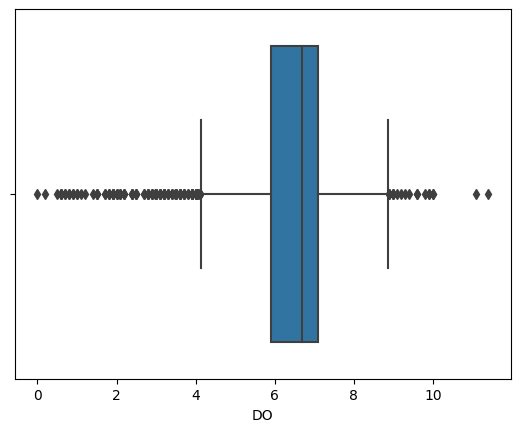

In [15]:
import seaborn as sns
# Créer un boxplot pour la colonne d'intérêt
sns.boxplot(x=df["DO"])

# Afficher le graphique
plt.show()

<Axes: title={'center': 'Missing Values Per Feature'}>

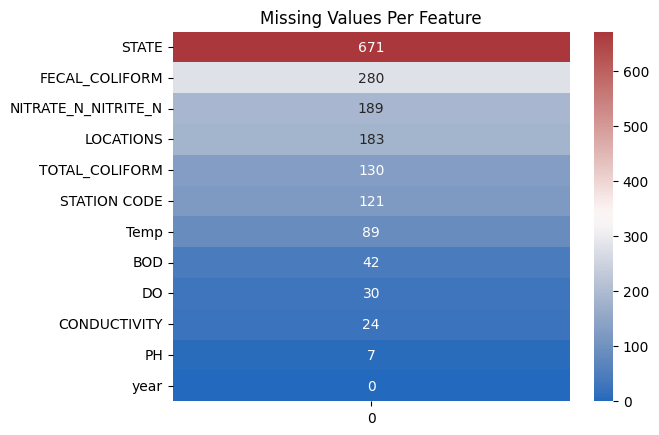

In [16]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [17]:
df_num = df.select_dtypes(exclude="object")# Selectioner les donneés numériques
df_num_col = df_num.columns 
imputer = SimpleImputer(strategy="median")#crée un objet imputer à l'aide de la classe SimpleImputer
#Remplacer toutes les valeurs manquantes dans les données numériques par la valeur médiane de chaque colonne
df_num = imputer.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns=df_num_col)

In [18]:
# Filling Categorical missing values
df_temp = df.select_dtypes(include="object")
df_temp.isnull().sum()

STATION CODE    121
LOCATIONS       183
STATE           671
dtype: int64

In [19]:
# ici on peut remplir ces valeurs par observer les autres attributs
# Exemple - 
pd.set_option('mode.chained_assignment', None)
df_temporaire = df_temp.copy()

df_temporaire[df_temporaire["STATION CODE"] == "1330"]
# Station Code qui a la valeur 1330 du Location - TAMBIRAPARANI qui appartient à STATE - TAMIL NADU
#je peux remplacer les occuerences du valeur NAN dans la case STATE par TAMILNADU
df_temporaire["STATE"][df_temporaire["STATION CODE"] == "1330"] = df_temporaire["STATE"][df_temporaire["STATION CODE"] == "1330"].fillna("TAMILNADU")

df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [20]:
# Les valeurs NULL dans l’attribut LOCATION sont dans l’attribut STATE (ex - au-dessus du dataframe)
# Ainsi, je remplirai les valeurs NULL dans l’attribut LOCATION avec la valeur STATE correspondante
# Et la valeur d’état sera remplacée par la fonction "fill_state" définie en dessous de cette cellule

def fill_locations(df_cat):
    location_null = df_cat[df_cat["LOCATIONS"].isnull()]
    location_null_indices = location_null.index
    for index in location_null_indices:
        state_value = location_null["STATE"][index]
        location_null["LOCATIONS"][index] = state_value
        location_null["STATE"][index] = np.nan
    df_cat[df_cat["LOCATIONS"].isnull()] = location_null
    return

fill_locations(df_temporaire)
df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [21]:
df_temporaire[df_temporaire["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


In [22]:
# je peux remplir les valeurs NULL du code de la station avec la valeur LOCATION correspondante (ex - au-dessus de la base de données)
#je vais faire la valeur LOCATION correspondante avec une autre valeur LOCATION identique et insérera la valeur du code station

def fill_code(df_cat):
    station_null = df_cat[df_cat["STATION CODE"].isnull()]
    station_null_indices = station_null.index
    for index in station_null_indices:
        stat_code = np.nan
        location_index = station_null["LOCATIONS"][index]
        code_at_location = df_cat["STATION CODE"][df_cat["LOCATIONS"] == location_index]
        for index_code in code_at_location.index:
            if (code_at_location[index_code] != np.nan):
                stat_code = code_at_location[index_code]
                break
        station_null["STATION CODE"][index] = stat_code
    df_cat[df_cat["STATION CODE"].isnull()] = station_null
    return

fill_code(df_temporaire)
df_temporaire[df_temporaire["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


In [23]:
# Remplissage de toutes les valeurs NAN d’état qui ont une valeur de code de station correspondante
def fill_state(df_cat):
    station_code = df_cat["STATION CODE"].unique()
    for index in range(station_code.shape[0]):
        if (station_code[index] != np.nan):
            df_state = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] 
            state_values = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]]
            state = np.nan
            for index_state in range(state_values.shape[0]):
                if (state_values.iloc[index_state] != np.nan):
                    state = state_values.iloc[index_state]
                    break
            df_state_fill = df_state.fillna(state) 
            df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] = df_state_fill
    return
fill_state(df_temporaire)
df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [24]:
df_temporaire.isnull().sum()

STATION CODE     4
LOCATIONS        2
STATE           12
dtype: int64

In [25]:
df_temporaire[df_temporaire["STATE"].isnull()]

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1106,1207,KABBANI AT MUTHANKARA,NaN
1107,1208,BHAVANI AT ELACHIVAZHY,NaN
1650,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1651,2048,"PATIALA KI RAO, CHANDIGARH",NaN
1652,2049,"SUKHNA CHOE, CHANDIGARH",NaN
1770,2047,NNANCHOE (ATTAWA CHOE),NaN
1771,2048,PATIALA KI RAO,NaN
1772,2049,SUKHNA CHOE,NaN


In [26]:
# Le premier emplacement KABBANI AT MUTHANKARA est dans l’ÉTAT Kerela
df_temporaire["STATE"][1106] = "KERALA"
df_temporaire["STATE"][1107] = "KERALA"
df_temporaire["STATE"][1650] = "CHANDIGARH"
df_temporaire["STATE"][1651] = "CHANDIGARH"
df_temporaire["STATE"][1652] = "CHANDIGARH"
df_temporaire["STATE"][1770] = "CHANDIGARH"
df_temporaire["STATE"][1771] = "CHANDIGARH"
df_temporaire["STATE"][1772] = "CHANDIGARH"
df_temporaire["STATE"][1784] = "DAMAN & DIU"
df_temporaire["STATE"][1785] = "DAMAN & DIU"
df_temporaire["STATION CODE"][1784] = "0000" 
df_temporaire["STATION CODE"][1785] = "0000"

<Axes: title={'center': 'Missing Values Per Feature'}>

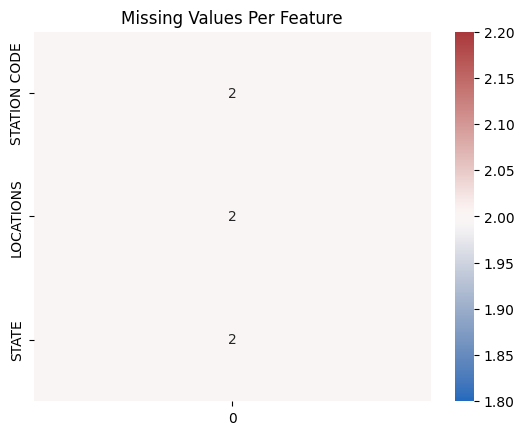

In [27]:
df_res = df_temporaire
plt.title('Missing Values Per Feature')
nans = df_res.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<Axes: title={'center': 'Missing Values Per Feature'}>

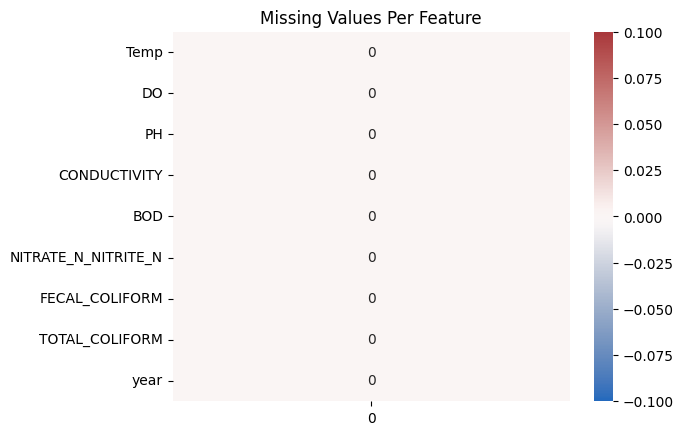

In [28]:
plt.title('Missing Values Per Feature')
nans = df_num.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<Axes: title={'center': 'Missing Values Per Feature'}>

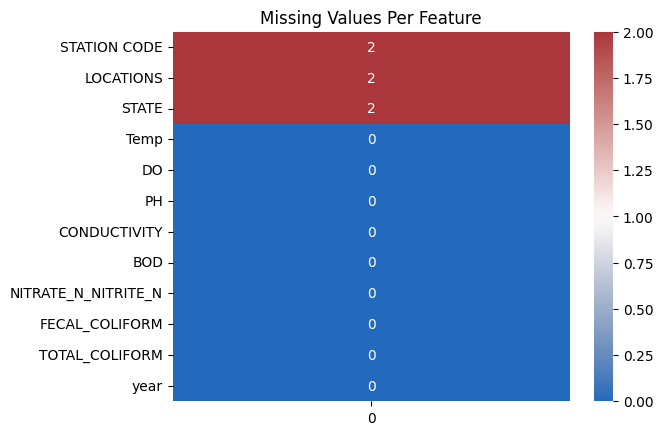

In [29]:
df_final = pd.concat([df_res, df_num], axis=1)
plt.title('Missing Values Per Feature')
nans = df_final.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<Axes: title={'center': 'Missing Values Per Feature'}>

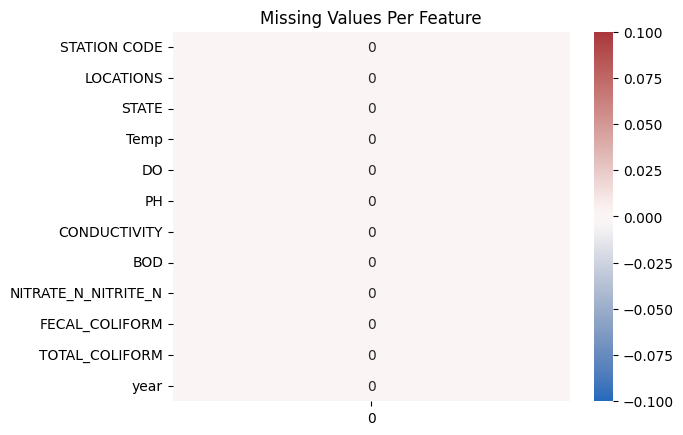

In [30]:
# Ce sont les exemples qui ne contiennent aucun attribut
# Les attributs remplis sont la médiane des colonnes correspondantes
# Il est donc préférable de les supprimer
df_null = df_final[(df_final["STATION CODE"].isnull()) & (df_final["LOCATIONS"].isnull()) & (df_final["STATE"].isnull())]
df_null_indices = df_null.index
df_final.drop(df_null_indices, axis=0, inplace=True)
df_null
plt.title('Missing Values Per Feature')
nans = df_final.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [31]:
df_final.head(5)

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.9,0.1,11.0,27.0,2014.0
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014.0
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014.0
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014.0
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014.0


In [32]:
df_final.shape

(1899, 12)

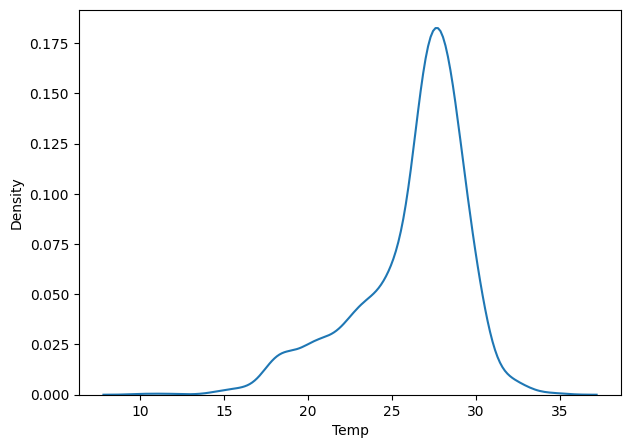

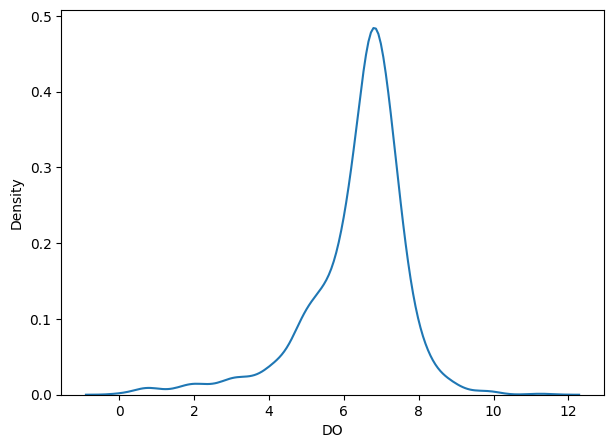

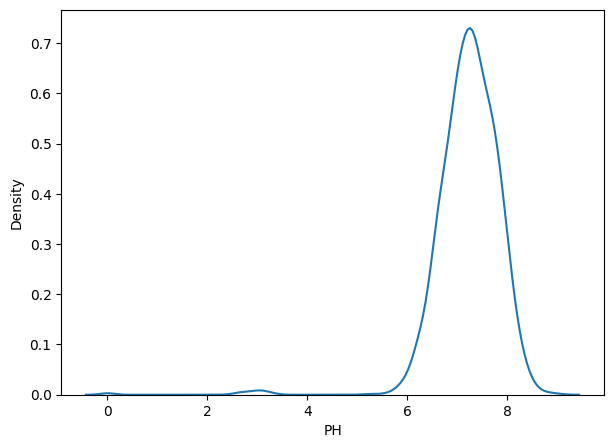

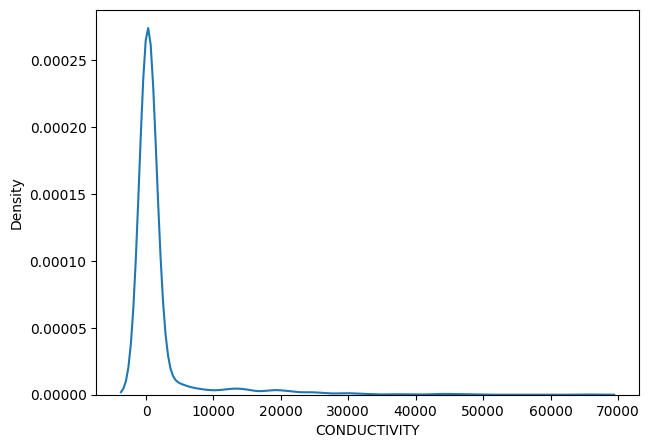

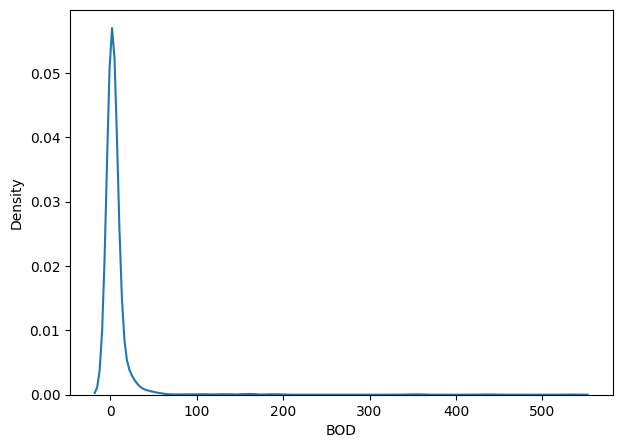

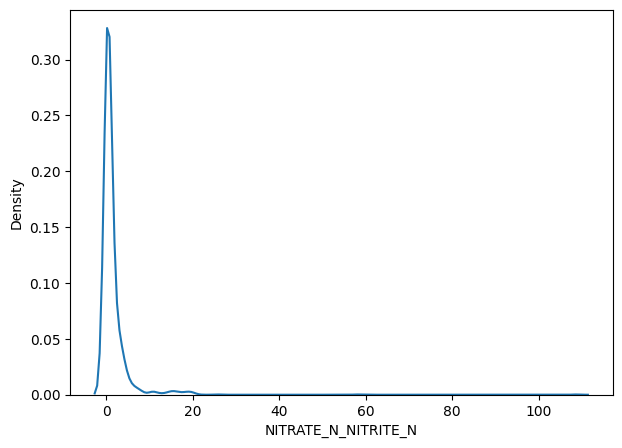

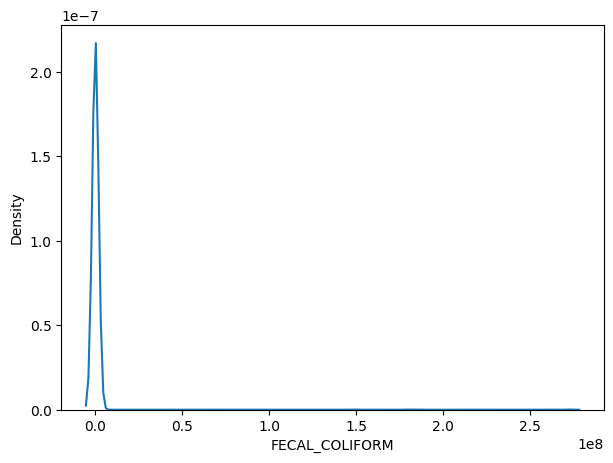

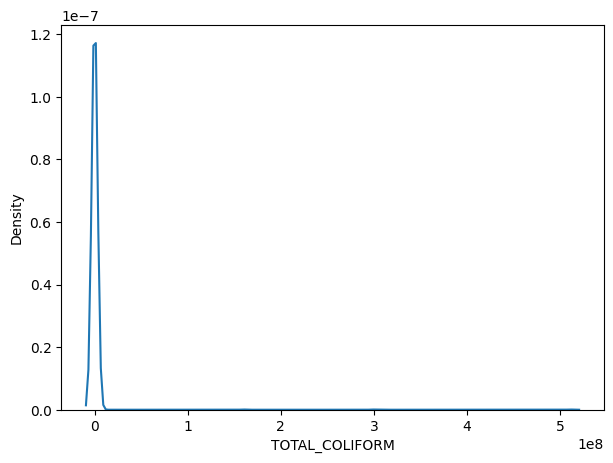

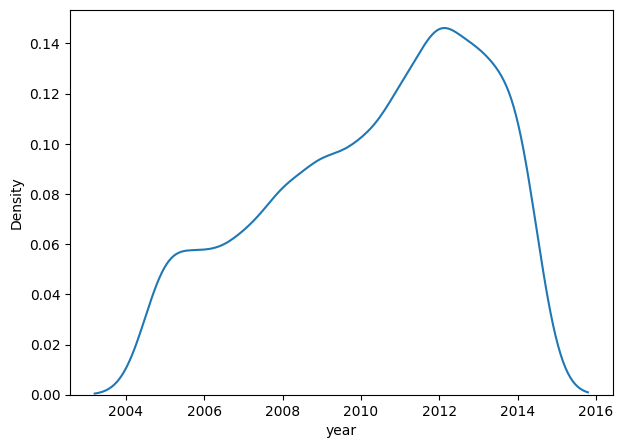

In [33]:
#Tracer PDFs de tous les attributs numériques de l’ensemble de données

df_num_final = df_final.select_dtypes(exclude="object")

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

In [34]:
# Ici, presque tous les plots kde sont gaussiens 
# Utilisation de la normalisation Z-Score pour détecter les valeurs aberrantes

df_num_final_norm = df_num_final.apply(zscore, axis=0)

def indices_of_greater_than_3(df_norm):
    indices_arr = []
    n_col = df_norm.shape[1]
    for index in range(n_col):
        col_index = df_norm.iloc[:, index]
        greater_than_3 = col_index[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(df_num_final_norm)
print("Number of outliers using Z-Score method: ", len(indices_arr))
df_final.iloc[indices_arr, :]

Number of outliers using Z-Score method:  125


,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year
741,2880,NAMBUL RIVER AT BISHNUPUR,MANIPUR,28.0,8.2,7.6,112.0,2.1,0.52,233.0,31.0,2012.0
745,2856,"THOUBAL RIVER AT YAIRIPOK, THOUBAL",MANIPUR,30.0,9.3,7.6,193.0,2.3,0.52,233.0,41.0,2012.0
37,2671,KUNDALIKA RIVER NEAR SALAV BRIDGE (SALINA ZONE...,MAHARASHTRA,25.3,5.3,7.7,24062.0,9.9,1.20,156.0,304.0,2014.0
88,2294,R KALLAI AT KALLAI BRIDGE,KERALA,26.3,3.7,7.7,32005.0,1.2,0.90,40000.0,60392.0,2014.0
108,2304,R MOGRAL AT MOGRAL BR.,KERALA,30.0,5.6,7.2,24360.0,2.1,0.30,92.0,447.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.00,1328.0,4975.0,2013.0
685,1023,GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA),PUNJAB,21.0,5.5,7.4,635.0,8.8,5.08,1400.0,5500.0,2012.0
172,3023,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUE...",TAMILNADU,24.3,0.9,7.6,2039.0,104.5,0.90,272521616.0,511090873.0,2014.0
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.00,1328.0,4975.0,2013.0


In [35]:
df_final.drop(indices_arr, axis=0, inplace=True)
df_final.shape

(1786, 12)

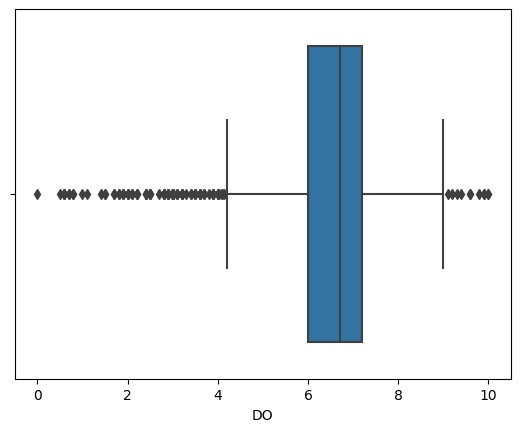

In [37]:
import seaborn as sns
# Créer un boxplot pour la colonne d'intérêt
sns.boxplot(x=df_final["DO"])

# Afficher le graphique
plt.show()


Feature Engineering

In [36]:
# Calculating Water Quality Index of each sample
df_num_final = df_final.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num_final.drop(["year", "Temp"], axis=1, inplace=True)

# Weight Vector(wi)
wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022])

# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 100, 1000])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0, 0])

def calc_wqi(sample): 
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [ ]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [ ]:
wqi_arr = calc_wqi_for_df(df_num_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_final = df_final.reset_index()

In [ ]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([df_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(1786, 13)

In [ ]:
# These are samples with negative WQI
df_wqi[(df_wqi["WQI"] < 0)]

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year,WQI
196,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,20.5,6.7,2.7,1350.0,3.3,1.10,7.0,16.0,2014.0,-6.855044
231,2,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,27.0,6.7,0.0,208.0,1.9,0.52,233.0,465.0,2013.0,-61.341117
234,1865,RIVER DHADAR AT KOTHADA,GUJARAT,27.0,6.7,0.0,506.0,1.9,6.00,26.0,227.0,2013.0,-65.303470
446,3375,LUKHA RIVER,MEGHALAYA,21.3,6.8,2.7,1074.0,3.2,2.33,4.0,11.0,2013.0,-8.214971
719,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,25.0,6.9,2.6,1072.0,3.2,1.17,3.0,21.0,2012.0,-10.579224


In [ ]:
# Removing the samples with negative WQI
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

In [ ]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (3 if (0 <=x <= 25)
                                        else(3 if (26<=x<=50)
                                        else(2 if (51<=x<=75)
                                        else(1 if (76<=x<=100)
                                        else 0)))))

In [ ]:
df_wqi.tail()

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year,WQI,WQI clf
1781,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,6.6,7.81,603.2,2.675,0.263,40.0,191.0,2005.0,77.315135,1
1782,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,28.0,6.6,7.49,571.5,2.091,0.256,151.0,273.0,2005.0,69.053768,2
1783,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,5.4,7.16,75.8,2.092,0.520,404.0,513.0,2005.0,74.670773,2
1784,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,30.0,5.4,7.37,104.8,1.802,0.215,456.0,557.0,2005.0,76.881207,1
1785,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",TRIPURA,29.0,5.3,7.37,102.2,2.552,0.202,526.0,583.0,2005.0,85.552020,1


In [ ]:
n_unsuitable=(df_wqi['WQI clf']==0).sum()
n_very_poor=(df_wqi['WQI clf']==1).sum()
n_poor=(df_wqi['WQI clf']==2).sum()
n_good=(df_wqi['WQI clf']==3).sum()
n_excellent=(df_wqi['WQI clf']==4).sum()

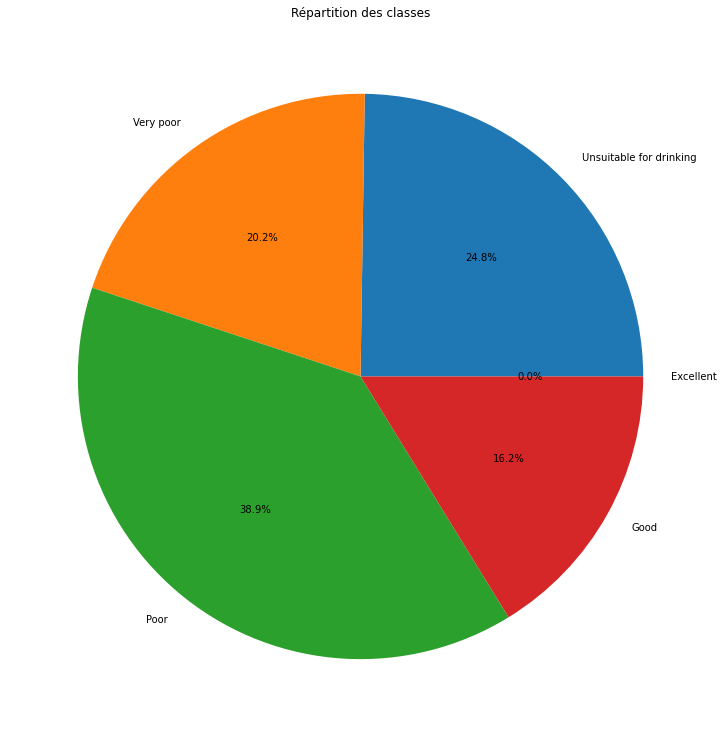

In [ ]:
import matplotlib.pyplot as plt
# Définition des classes et de leurs effectifs
classes = ['Unsuitable for drinking', 'Very poor', 'Poor', 'Good', 'Excellent']
effectifs = [n_unsuitable,n_very_poor,n_poor,n_good,n_excellent]
# Création du diagramme circulaire
fig, ax = plt.subplots()
ax.pie(effectifs, labels=classes, autopct='%2.1f%%')
# Définir la taille de la figure
fig.set_size_inches(14, 13)
# Ajout d'un titre
ax.set_title('Répartition des classes')
# Affichage du diagramme
plt.show()


In [ ]:
import pandas as pd
# Enregistrement en format CSV sans index
df_wqi.to_csv('Data/Water_median.csv', index=False)

# remplacer les valeurs manquantes par le moyenne

In [40]:
df=pd.read_csv("water_dataX.csv",encoding= 'unicode_escape')
#Selectionner seulement les 1900 examples premiers car les autres exemples incorect 
#en plus contient beaucoup des donneés aberantes
df = df.iloc[0:1901, :]

In [41]:
# Checking for datatypes of the dataset
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [43]:
#convertir le types des donneés d'un certains variables en float
df['Temp']=pd.to_numeric(df['Temp'], errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'], errors='coerce')
df['PH']=pd.to_numeric(df['PH'], errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'], errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'], errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce')
df['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(df['FECAL COLIFORM (MPN/100ml)'], errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')

In [44]:
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [45]:
#renommer les variables par des target plus simplement à utiliser que les anciennes 
df = df.rename(columns={'D.O. (mg/l)': 'DO'})
df = df.rename(columns={'CONDUCTIVITY (�mhos/cm)': 'CONDUCTIVITY'})
df = df.rename(columns={'B.O.D. (mg/l)': 'BOD'})
df = df.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)': 'NITRATE_N_NITRITE_N'})
df = df.rename(columns={'FECAL COLIFORM (MPN/100ml)': 'FECAL_COLIFORM'})
df = df.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean': 'TOTAL_COLIFORM'})
df.head(5)

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY (µmhos/cm),BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014


In [46]:
# Remplacer la chaine de caractere NAN valeur par la valeur NAN (np.nan)
def convert_to_nan(df):
    #récupère le nombre de colonnes dans df en utilisant l'attribut shape de l'objet DataFrame
    #qui renvoie un tuple contenant le nombre de lignes et de colonnes
    n_col = df.shape[1] 
    #on parcourt chaque colonne du DataFrame df à l'aide de la boucle for et index
    for index in range(n_col):
        #La ligne df.iloc[:, index] permet d'accéder à toutes les lignes de la colonne correspondante.
        #La méthode replace() est ensuite appliquée à la colonne pour remplacer chaque occurrence 
        #de la chaîne de caractères "NAN" par la valeur NaN de la bibliothèque Numpy. 
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

df = convert_to_nan(df)

In [47]:
df.shape

(1901, 12)

<Axes: title={'center': 'Missing Values Per Feature'}>

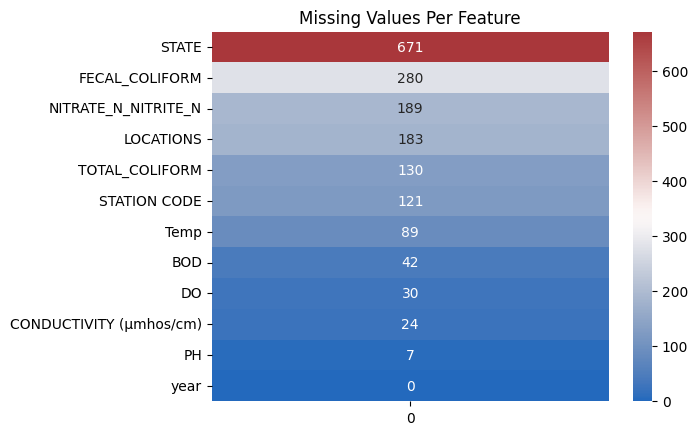

In [48]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [49]:
df_num = df.select_dtypes(exclude="object")# Selectioner les donneés numériques
df_num_col = df_num.columns 
imputer = SimpleImputer(strategy="mean")#crée un objet imputer à l'aide de la classe SimpleImputer
#Remplacer toutes les valeurs manquantes dans les données numériques par la valeur médiane de chaque colonne
df_num = imputer.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns=df_num_col)

In [50]:
# Filling Categorical missing values
df_temp = df.select_dtypes(include="object")
df_temp.isnull().sum()

STATION CODE    121
LOCATIONS       183
STATE           671
dtype: int64

In [51]:
# ici on peut remplir ces valeurs par observer les autres attributs
# Exemple - 
pd.set_option('mode.chained_assignment', None)
df_temporaire = df_temp.copy()

df_temporaire[df_temporaire["STATION CODE"] == "1330"]
# Station Code qui a la valeur 1330 du Location - TAMBIRAPARANI qui appartient à STATE - TAMIL NADU
#je peux remplacer les occuerences du valeur NAN dans la case STATE par TAMILNADU
df_temporaire["STATE"][df_temporaire["STATION CODE"] == "1330"] = df_temporaire["STATE"][df_temporaire["STATION CODE"] == "1330"].fillna("TAMILNADU")

df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [52]:
# Les valeurs NULL dans l’attribut LOCATION sont dans l’attribut STATE (ex - au-dessus du dataframe)
# Ainsi, je remplirai les valeurs NULL dans l’attribut LOCATION avec la valeur STATE correspondante
# Et la valeur d’état sera remplacée par la fonction "fill_state" définie en dessous de cette cellule

def fill_locations(df_cat):
    location_null = df_cat[df_cat["LOCATIONS"].isnull()]
    location_null_indices = location_null.index
    for index in location_null_indices:
        state_value = location_null["STATE"][index]
        location_null["LOCATIONS"][index] = state_value
        location_null["STATE"][index] = np.nan
    df_cat[df_cat["LOCATIONS"].isnull()] = location_null
    return

fill_locations(df_temporaire)
df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [53]:
df_temporaire[df_temporaire["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


In [54]:
# je peux remplir les valeurs NULL du code de la station avec la valeur LOCATION correspondante (ex - au-dessus de la base de données)
#je vais faire la valeur LOCATION correspondante avec une autre valeur LOCATION identique et insérera la valeur du code station

def fill_code(df_cat):
    station_null = df_cat[df_cat["STATION CODE"].isnull()]
    station_null_indices = station_null.index
    for index in station_null_indices:
        stat_code = np.nan
        location_index = station_null["LOCATIONS"][index]
        code_at_location = df_cat["STATION CODE"][df_cat["LOCATIONS"] == location_index]
        for index_code in code_at_location.index:
            if (code_at_location[index_code] != np.nan):
                stat_code = code_at_location[index_code]
                break
        station_null["STATION CODE"][index] = stat_code
    df_cat[df_cat["STATION CODE"].isnull()] = station_null
    return

fill_code(df_temporaire)
df_temporaire[df_temporaire["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


In [55]:
# Remplissage de toutes les valeurs NAN d’état qui ont une valeur de code de station correspondante
def fill_state(df_cat):
    station_code = df_cat["STATION CODE"].unique()
    for index in range(station_code.shape[0]):
        if (station_code[index] != np.nan):
            df_state = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] 
            state_values = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]]
            state = np.nan
            for index_state in range(state_values.shape[0]):
                if (state_values.iloc[index_state] != np.nan):
                    state = state_values.iloc[index_state]
                    break
            df_state_fill = df_state.fillna(state) 
            df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] = df_state_fill
    return
fill_state(df_temporaire)
df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [56]:
df_temporaire.isnull().sum()

STATION CODE     4
LOCATIONS        2
STATE           12
dtype: int64

In [57]:
df_temporaire[df_temporaire["STATE"].isnull()]

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1106,1207,KABBANI AT MUTHANKARA,NaN
1107,1208,BHAVANI AT ELACHIVAZHY,NaN
1650,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1651,2048,"PATIALA KI RAO, CHANDIGARH",NaN
1652,2049,"SUKHNA CHOE, CHANDIGARH",NaN
1770,2047,NNANCHOE (ATTAWA CHOE),NaN
1771,2048,PATIALA KI RAO,NaN
1772,2049,SUKHNA CHOE,NaN


In [58]:
# Le premier emplacement KABBANI AT MUTHANKARA est dans l’ÉTAT Kerela
df_temporaire["STATE"][1106] = "KERALA"
df_temporaire["STATE"][1107] = "KERALA"
df_temporaire["STATE"][1650] = "CHANDIGARH"
df_temporaire["STATE"][1651] = "CHANDIGARH"
df_temporaire["STATE"][1652] = "CHANDIGARH"
df_temporaire["STATE"][1770] = "CHANDIGARH"
df_temporaire["STATE"][1771] = "CHANDIGARH"
df_temporaire["STATE"][1772] = "CHANDIGARH"
df_temporaire["STATE"][1784] = "DAMAN & DIU"
df_temporaire["STATE"][1785] = "DAMAN & DIU"
df_temporaire["STATION CODE"][1784] = "0000" 
df_temporaire["STATION CODE"][1785] = "0000"

<Axes: title={'center': 'Missing Values Per Feature'}>

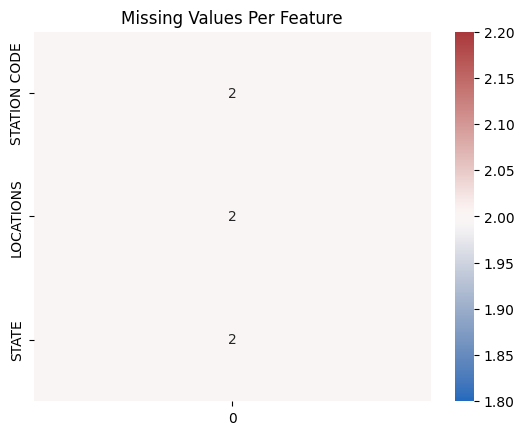

In [59]:
df_res = df_temporaire
plt.title('Missing Values Per Feature')
nans = df_res.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<Axes: title={'center': 'Missing Values Per Feature'}>

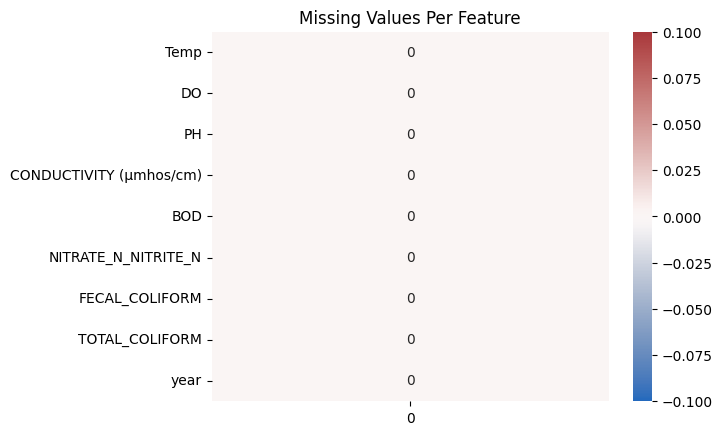

In [60]:
plt.title('Missing Values Per Feature')
nans = df_num.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<Axes: title={'center': 'Missing Values Per Feature'}>

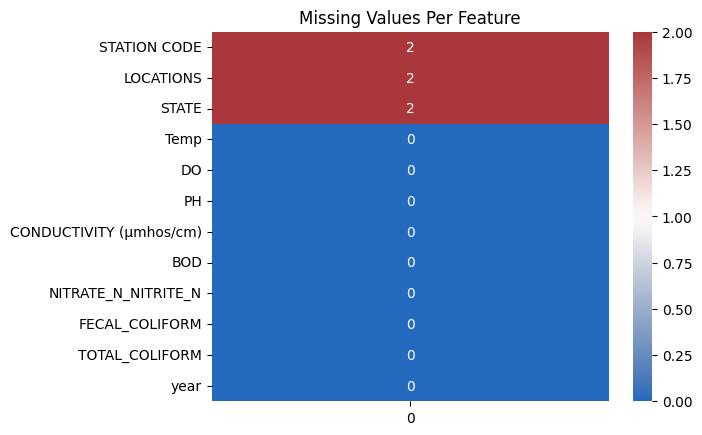

In [61]:
df_final = pd.concat([df_res, df_num], axis=1)
plt.title('Missing Values Per Feature')
nans = df_final.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<Axes: title={'center': 'Missing Values Per Feature'}>

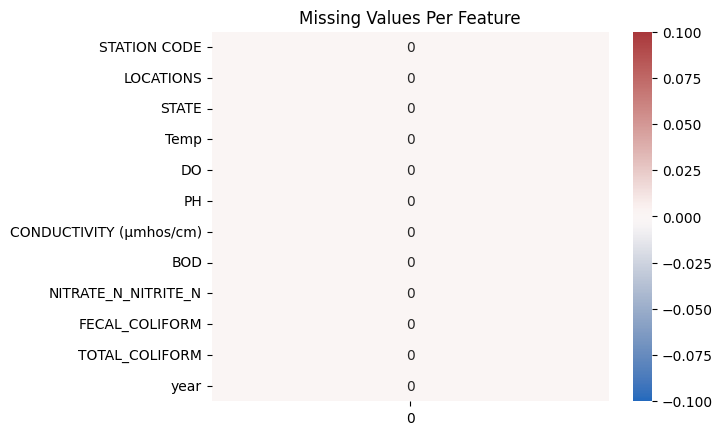

In [62]:
# Ce sont les exemples qui ne contiennent aucun attribut
# Les attributs remplis sont la médiane des colonnes correspondantes
# Il est donc préférable de les supprimer
df_null = df_final[(df_final["STATION CODE"].isnull()) & (df_final["LOCATIONS"].isnull()) & (df_final["STATE"].isnull())]
df_null_indices = df_null.index
df_final.drop(df_null_indices, axis=0, inplace=True)
df_null
plt.title('Missing Values Per Feature')
nans = df_final.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [63]:
df_final.shape

(1899, 12)

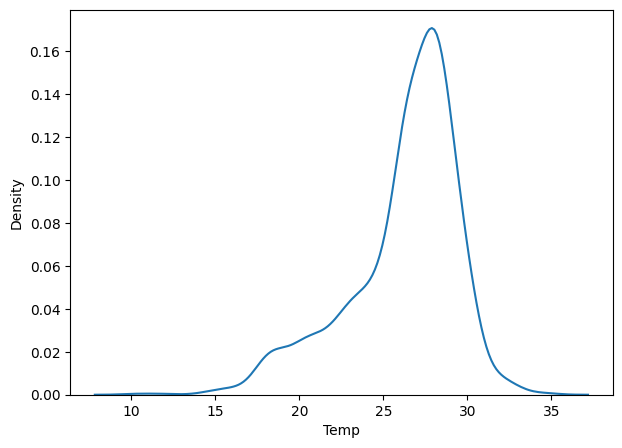

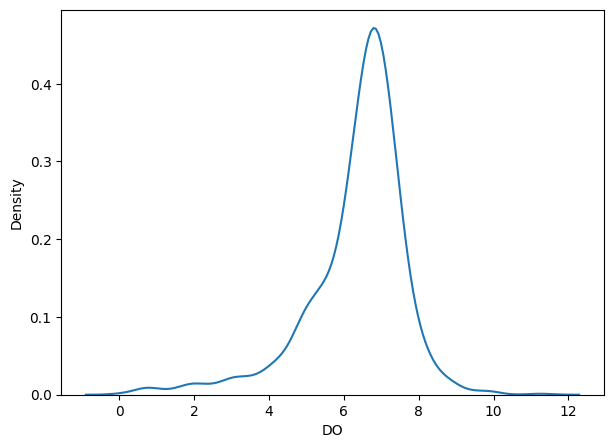

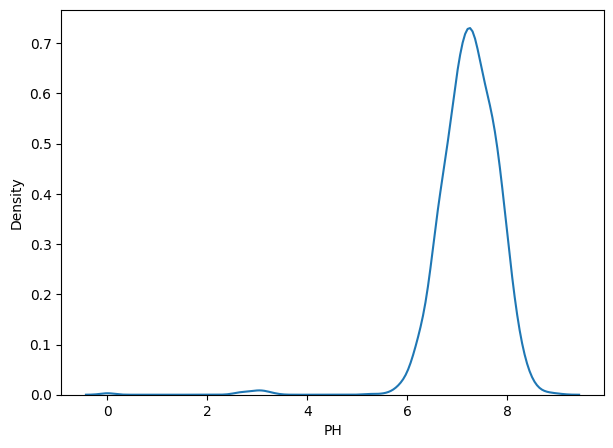

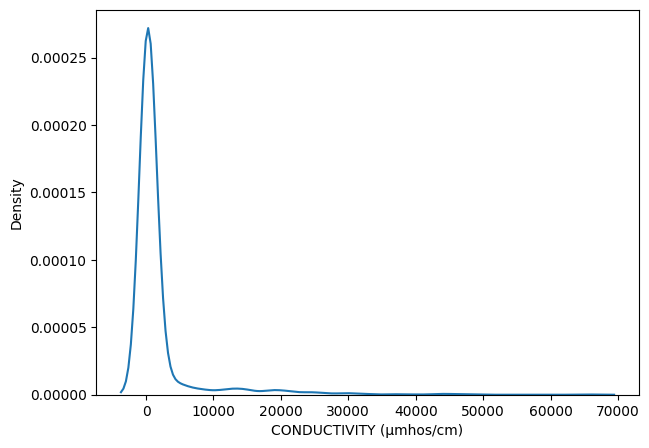

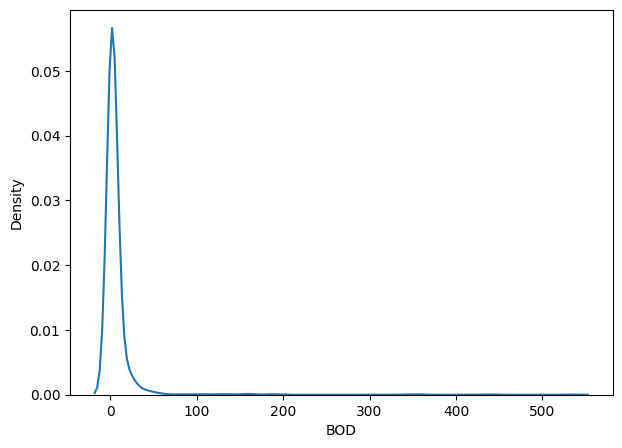

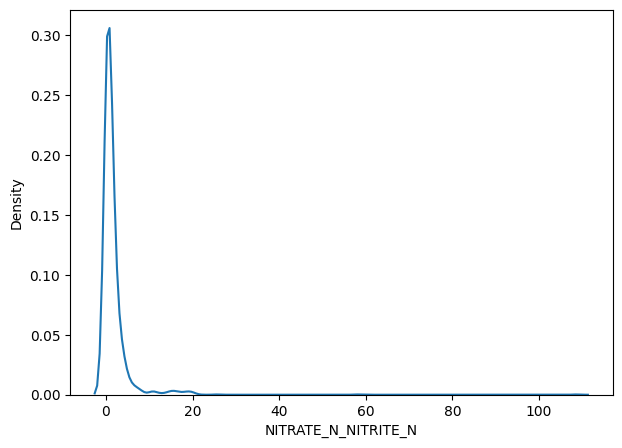

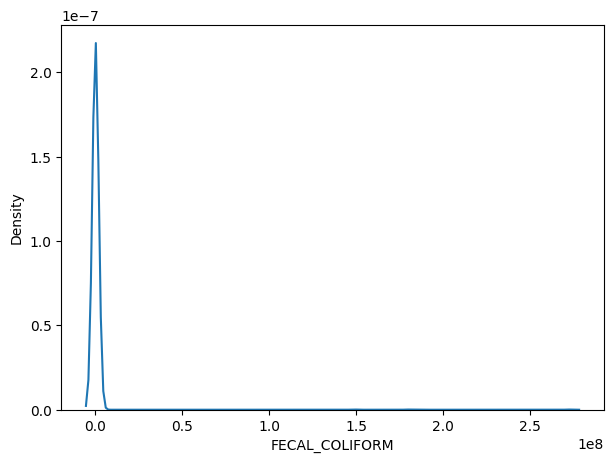

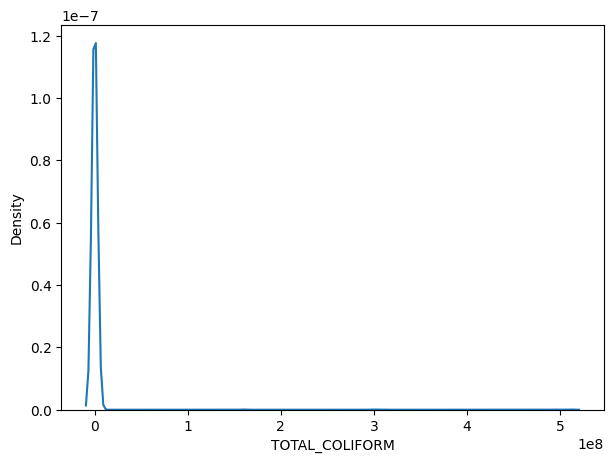

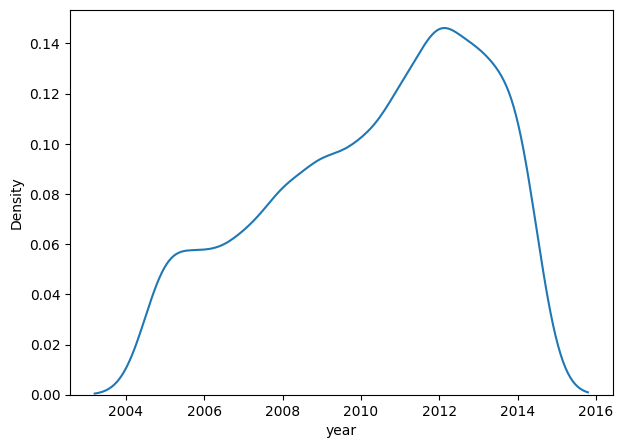

In [64]:
# PLotting PDFs of all the numeric attributes in the dataset

df_num_final = df_final.select_dtypes(exclude="object")

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

In [65]:
# Ici, presque tous les plots kde sont gaussiens 
# Utilisation de la normalisation Z-Score pour détecter les valeurs aberrantes

df_num_final_norm = df_num_final.apply(zscore, axis=0)

def indices_of_greater_than_3(df_norm):
    indices_arr = []
    n_col = df_norm.shape[1]
    for index in range(n_col):
        col_index = df_norm.iloc[:, index]
        greater_than_3 = col_index[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(df_num_final_norm)
print("Number of outliers using Z-Score method: ", len(indices_arr))
df_final.iloc[indices_arr, :]


Number of outliers using Z-Score method:  125


,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY (µmhos/cm),BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year
741,2880,NAMBUL RIVER AT BISHNUPUR,MANIPUR,28.0,8.2,7.6,112.0,2.1,1.65783,3.746062e+05,31.0,2012.0
745,2856,"THOUBAL RIVER AT YAIRIPOK, THOUBAL",MANIPUR,30.0,9.3,7.6,193.0,2.3,1.65783,3.746062e+05,41.0,2012.0
37,2671,KUNDALIKA RIVER NEAR SALAV BRIDGE (SALINA ZONE...,MAHARASHTRA,25.3,5.3,7.7,24062.0,9.9,1.20000,1.560000e+02,304.0,2014.0
88,2294,R KALLAI AT KALLAI BRIDGE,KERALA,26.3,3.7,7.7,32005.0,1.2,0.90000,4.000000e+04,60392.0,2014.0
108,2304,R MOGRAL AT MOGRAL BR.,KERALA,30.0,5.6,7.2,24360.0,2.1,0.30000,9.200000e+01,447.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.00000,1.328000e+03,4975.0,2013.0
685,1023,GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA),PUNJAB,21.0,5.5,7.4,635.0,8.8,5.08000,1.400000e+03,5500.0,2012.0
172,3023,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUE...",TAMILNADU,24.3,0.9,7.6,2039.0,104.5,0.90000,2.725216e+08,511090873.0,2014.0
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.00000,1.328000e+03,4975.0,2013.0


In [66]:
df_final.drop(indices_arr, axis=0, inplace=True)
df_final.shape

(1786, 12)

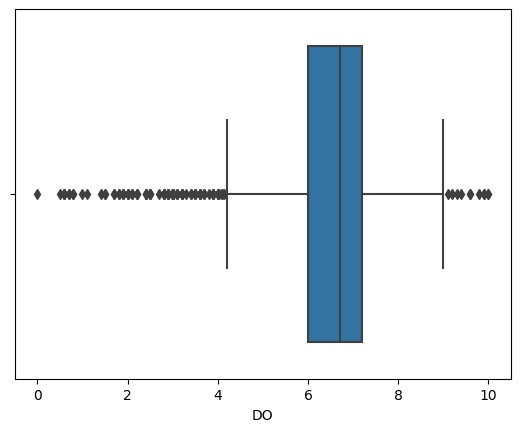

In [67]:
import seaborn as sns
# Créer un boxplot pour la colonne d'intérêt
sns.boxplot(x=df_final["DO"])

# Afficher le graphique
plt.show()


In [ ]:
# Calculating Water Quality Index of each sample
df_num_final = df_final.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num_final.drop(["year", "Temp"], axis=1, inplace=True)

# Weight Vector(wi)
wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022])

# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 100, 1000])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0, 0])

def calc_wqi(sample): 
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [ ]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [ ]:
wqi_arr = calc_wqi_for_df(df_num_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_final = df_final.reset_index()

In [ ]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([df_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(1786, 13)

In [ ]:
# These are samples with negative WQI
df_wqi[(df_wqi["WQI"] < 0)]

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year,WQI
196,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,20.500000,6.700000,2.7,1350.0,3.300000,1.10,7.0,16.0,2014.0,-6.855044
234,1865,RIVER DHADAR AT KOTHADA,GUJARAT,26.195054,6.354072,0.0,506.0,6.855576,6.00,26.0,227.0,2013.0,-19.772499
446,3375,LUKHA RIVER,MEGHALAYA,21.300000,6.800000,2.7,1074.0,3.200000,2.33,4.0,11.0,2013.0,-8.214971
719,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,25.000000,6.900000,2.6,1072.0,3.200000,1.17,3.0,21.0,2012.0,-10.579224


In [ ]:
# Removing the samples with negative WQI
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

In [ ]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (4 if (0 <=x <= 25)
                                        else(3 if (26<=x<=50)
                                        else(2 if (51<=x<=75)
                                        else(1 if (76<=x<=100)
                                        else 0)))))

In [ ]:
df_wqi.tail()

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year,WQI,WQI clf
1781,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,26.195054,6.6,7.81,603.2,2.675,0.26300,40.0,191.0,2005.0,77.315135,1
1782,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,28.000000,6.6,7.49,571.5,2.091,0.25600,151.0,273.0,2005.0,69.053768,2
1783,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.000000,5.4,7.16,75.8,2.092,1.65783,404.0,513.0,2005.0,74.795176,2
1784,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,30.000000,5.4,7.37,104.8,1.802,0.21500,456.0,557.0,2005.0,76.881207,1
1785,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",TRIPURA,29.000000,5.3,7.37,102.2,2.552,0.20200,526.0,583.0,2005.0,85.552020,1


In [ ]:
n_unsuitable=(df_wqi['WQI clf']==0).sum()
n_very_poor=(df_wqi['WQI clf']==1).sum()
n_poor=(df_wqi['WQI clf']==2).sum()
n_good=(df_wqi['WQI clf']==3).sum()
n_excellent=(df_wqi['WQI clf']==4).sum()

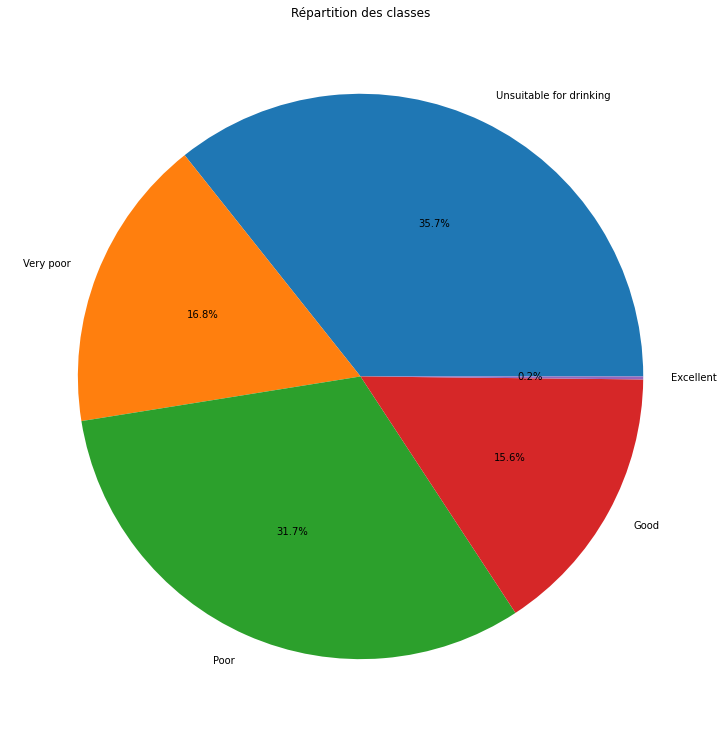

In [ ]:
import matplotlib.pyplot as plt
# Définition des classes et de leurs effectifs
classes = ['Unsuitable for drinking', 'Very poor', 'Poor', 'Good', 'Excellent']
effectifs = [n_unsuitable,n_very_poor,n_poor,n_good,n_excellent]
# Création du diagramme circulaire
fig, ax = plt.subplots()
ax.pie(effectifs, labels=classes, autopct='%2.1f%%')
# Définir la taille de la figure
fig.set_size_inches(14, 13)
# Ajout d'un titre
ax.set_title('Répartition des classes')
# Affichage du diagramme
plt.show()

In [ ]:
import pandas as pd
# Enregistrement en format CSV sans index
df_wqi.to_csv('Data/Water_dataX_mean.csv', index=False)

# remplacer les valeurs manquantes par le plus frequent

In [69]:
df=pd.read_csv("water_dataX.csv",encoding= 'unicode_escape')
#Selectionner seulement les 1900 examples premiers car les autres exemples incorect 
#en plus contient beaucoup des donneés aberantes
df = df.iloc[0:1901, :]

In [70]:
#afficher les 5 premiére lignes
df.head(5)

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [71]:
#afficher la taille du dataframe (nb_lignes,nb_colonnes)
df.shape

(1901, 12)

In [72]:
#afficher les types des données dans chaque variables du dataframe
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [73]:
df.nunique()

STATION CODE                         321
LOCATIONS                            656
STATE                                203
Temp                                 179
D.O. (mg/l)                          166
PH                                   185
CONDUCTIVITY (µmhos/cm)              971
B.O.D. (mg/l)                        404
NITRATENAN N+ NITRITENANN (mg/l)     469
FECAL COLIFORM (MPN/100ml)           819
TOTAL COLIFORM (MPN/100ml)Mean      1061
year                                  10
dtype: int64

In [74]:
#convertir le types des donneés d'un certains variables en float
df['Temp']=pd.to_numeric(df['Temp'], errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'], errors='coerce')
df['PH']=pd.to_numeric(df['PH'], errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'], errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'], errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce')
df['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(df['FECAL COLIFORM (MPN/100ml)'], errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')

In [75]:
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [76]:
#renommer les variables par des target plus simplement à utiliser que les anciennes 
df = df.rename(columns={'D.O. (mg/l)': 'DO'})
df = df.rename(columns={'CONDUCTIVITY (�mhos/cm)': 'CONDUCTIVITY'})
df = df.rename(columns={'B.O.D. (mg/l)': 'BOD'})
df = df.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)': 'NITRATE_N_NITRITE_N'})
df = df.rename(columns={'FECAL COLIFORM (MPN/100ml)': 'FECAL_COLIFORM'})
df = df.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean': 'TOTAL_COLIFORM'})
df.head(5)

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY (µmhos/cm),BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014


In [77]:
# Remplacer la chaine de caractere NAN valeur par la valeur NAN (np.nan)
def convert_to_nan(df):
    #récupère le nombre de colonnes dans df en utilisant l'attribut shape de l'objet DataFrame
    #qui renvoie un tuple contenant le nombre de lignes et de colonnes
    n_col = df.shape[1] 
    #on parcourt chaque colonne du DataFrame df à l'aide de la boucle for et index
    for index in range(n_col):
        #La ligne df.iloc[:, index] permet d'accéder à toutes les lignes de la colonne correspondante.
        #La méthode replace() est ensuite appliquée à la colonne pour remplacer chaque occurrence 
        #de la chaîne de caractères "NAN" par la valeur NaN de la bibliothèque Numpy. 
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

df = convert_to_nan(df)

In [78]:
df.shape

(1901, 12)

<Axes: title={'center': 'Missing Values Per Feature'}>

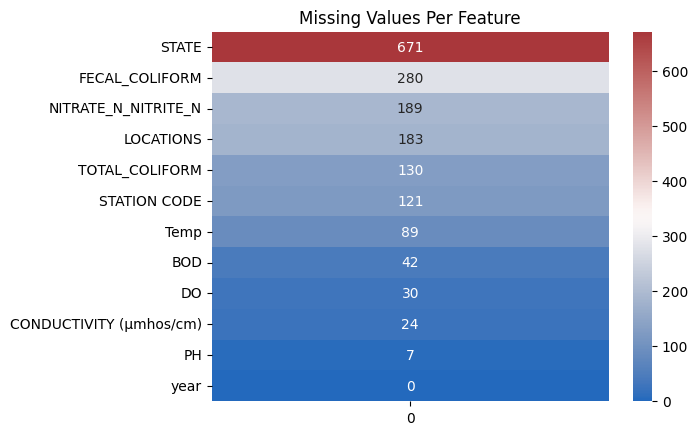

In [79]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [80]:
df_num = df.select_dtypes(exclude="object")# Selectioner les donneés numériques
df_num_col = df_num.columns 
imputer = SimpleImputer(strategy="most_frequent")#crée un objet imputer à l'aide de la classe SimpleImputer
#Remplacer toutes les valeurs manquantes dans les données numériques par la valeur médiane de chaque colonne
df_num = imputer.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns=df_num_col)

In [81]:
# Filling Categorical missing values
df_temp = df.select_dtypes(include="object")
df_temp.isnull().sum()

STATION CODE    121
LOCATIONS       183
STATE           671
dtype: int64

In [82]:
# ici on peut remplir ces valeurs par observer les autres attributs
# Exemple - 
pd.set_option('mode.chained_assignment', None)
df_temporaire = df_temp.copy()

df_temporaire[df_temporaire["STATION CODE"] == "1330"]
# Station Code qui a la valeur 1330 du Location - TAMBIRAPARANI qui appartient à STATE - TAMIL NADU
#je peux remplacer les occuerences du valeur NAN dans la case STATE par TAMILNADU
df_temporaire["STATE"][df_temporaire["STATION CODE"] == "1330"] = df_temporaire["STATE"][df_temporaire["STATION CODE"] == "1330"].fillna("TAMILNADU")

df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [83]:
# Les valeurs NULL dans l’attribut LOCATION sont dans l’attribut STATE (ex - au-dessus du dataframe)
# Ainsi, je remplirai les valeurs NULL dans l’attribut LOCATION avec la valeur STATE correspondante
# Et la valeur d’état sera remplacée par la fonction "fill_state" définie en dessous de cette cellule

def fill_locations(df_cat):
    location_null = df_cat[df_cat["LOCATIONS"].isnull()]
    location_null_indices = location_null.index
    for index in location_null_indices:
        state_value = location_null["STATE"][index]
        location_null["LOCATIONS"][index] = state_value
        location_null["STATE"][index] = np.nan
    df_cat[df_cat["LOCATIONS"].isnull()] = location_null
    return

fill_locations(df_temporaire)
df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [84]:
df_temporaire[df_temporaire["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


In [85]:
# je peux remplir les valeurs NULL du code de la station avec la valeur LOCATION correspondante (ex - au-dessus de la base de données)
#je vais faire la valeur LOCATION correspondante avec une autre valeur LOCATION identique et insérera la valeur du code station

def fill_code(df_cat):
    station_null = df_cat[df_cat["STATION CODE"].isnull()]
    station_null_indices = station_null.index
    for index in station_null_indices:
        stat_code = np.nan
        location_index = station_null["LOCATIONS"][index]
        code_at_location = df_cat["STATION CODE"][df_cat["LOCATIONS"] == location_index]
        for index_code in code_at_location.index:
            if (code_at_location[index_code] != np.nan):
                stat_code = code_at_location[index_code]
                break
        station_null["STATION CODE"][index] = stat_code
    df_cat[df_cat["STATION CODE"].isnull()] = station_null
    return

fill_code(df_temporaire)
df_temporaire[df_temporaire["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


In [86]:
# Remplissage de toutes les valeurs NAN d’état qui ont une valeur de code de station correspondante
def fill_state(df_cat):
    station_code = df_cat["STATION CODE"].unique()
    for index in range(station_code.shape[0]):
        if (station_code[index] != np.nan):
            df_state = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] 
            state_values = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]]
            state = np.nan
            for index_state in range(state_values.shape[0]):
                if (state_values.iloc[index_state] != np.nan):
                    state = state_values.iloc[index_state]
                    break
            df_state_fill = df_state.fillna(state) 
            df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] = df_state_fill
    return
fill_state(df_temporaire)
df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [87]:
df_temporaire.isnull().sum()

STATION CODE     4
LOCATIONS        2
STATE           12
dtype: int64

In [88]:
df_temporaire[df_temporaire["STATE"].isnull()]

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1106,1207,KABBANI AT MUTHANKARA,NaN
1107,1208,BHAVANI AT ELACHIVAZHY,NaN
1650,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1651,2048,"PATIALA KI RAO, CHANDIGARH",NaN
1652,2049,"SUKHNA CHOE, CHANDIGARH",NaN
1770,2047,NNANCHOE (ATTAWA CHOE),NaN
1771,2048,PATIALA KI RAO,NaN
1772,2049,SUKHNA CHOE,NaN


In [89]:
# Le premier emplacement KABBANI AT MUTHANKARA est dans l’ÉTAT Kerela
df_temporaire["STATE"][1106] = "KERALA"
df_temporaire["STATE"][1107] = "KERALA"
df_temporaire["STATE"][1650] = "CHANDIGARH"
df_temporaire["STATE"][1651] = "CHANDIGARH"
df_temporaire["STATE"][1652] = "CHANDIGARH"
df_temporaire["STATE"][1770] = "CHANDIGARH"
df_temporaire["STATE"][1771] = "CHANDIGARH"
df_temporaire["STATE"][1772] = "CHANDIGARH"
df_temporaire["STATE"][1784] = "DAMAN & DIU"
df_temporaire["STATE"][1785] = "DAMAN & DIU"
df_temporaire["STATION CODE"][1784] = "0000" 
df_temporaire["STATION CODE"][1785] = "0000"

<Axes: title={'center': 'Missing Values Per Feature'}>

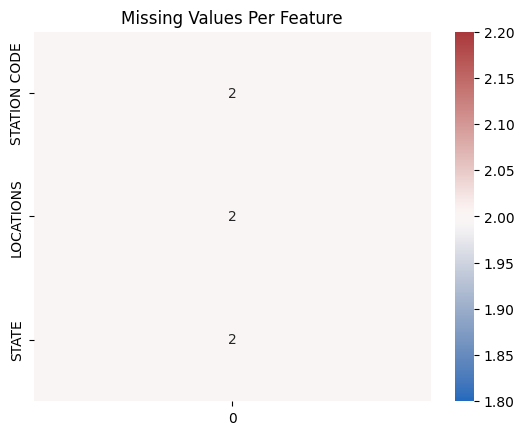

In [90]:
df_res = df_temporaire
plt.title('Missing Values Per Feature')
nans = df_res.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<Axes: title={'center': 'Missing Values Per Feature'}>

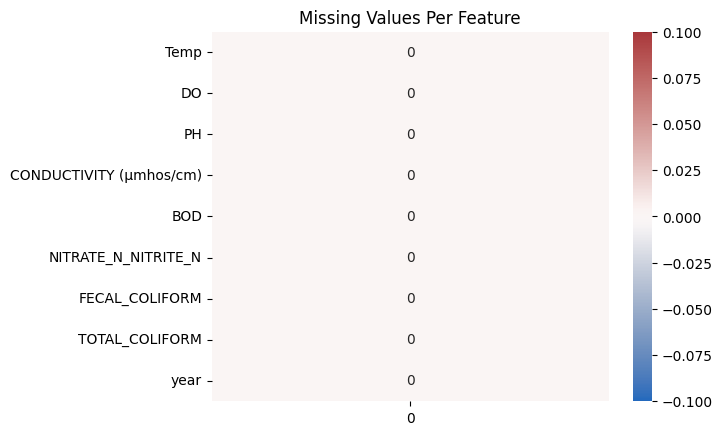

In [91]:
plt.title('Missing Values Per Feature')
nans = df_num.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<Axes: title={'center': 'Missing Values Per Feature'}>

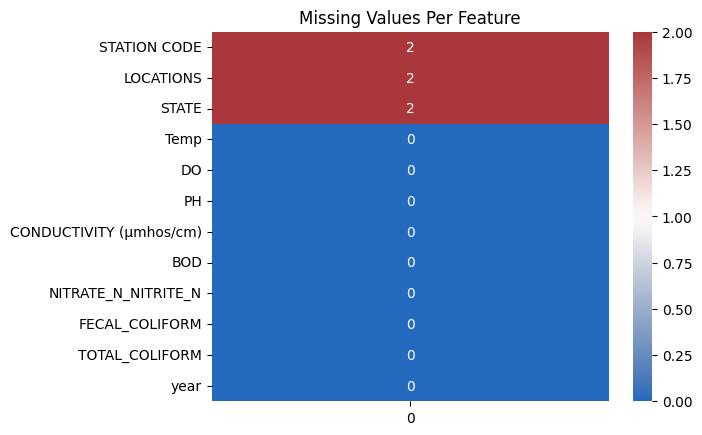

In [92]:
df_final = pd.concat([df_res, df_num], axis=1)
plt.title('Missing Values Per Feature')
nans = df_final.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<Axes: title={'center': 'Missing Values Per Feature'}>

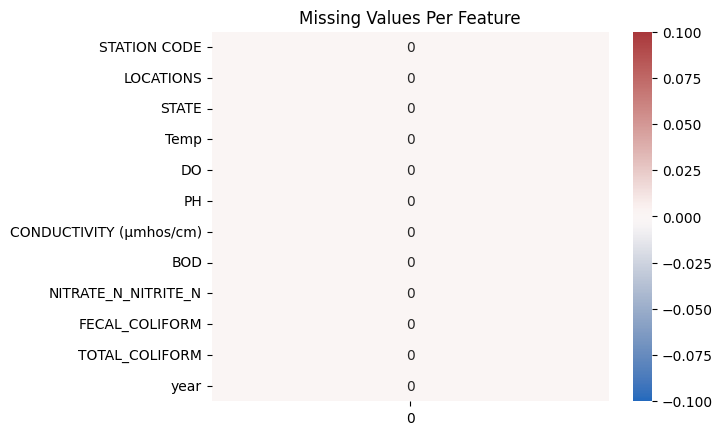

In [93]:
# Ce sont les exemples qui ne contiennent aucun attribut
# Les attributs remplis sont la médiane des colonnes correspondantes
# Il est donc préférable de les supprimer
df_null = df_final[(df_final["STATION CODE"].isnull()) & (df_final["LOCATIONS"].isnull()) & (df_final["STATE"].isnull())]
df_null_indices = df_null.index
df_final.drop(df_null_indices, axis=0, inplace=True)
df_null
plt.title('Missing Values Per Feature')
nans = df_final.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [94]:
df_final.head(5)

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY (µmhos/cm),BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.5,0.1,11.0,27.0,2014.0
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014.0
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014.0
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014.0
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014.0


In [95]:
df_final.shape

(1899, 12)

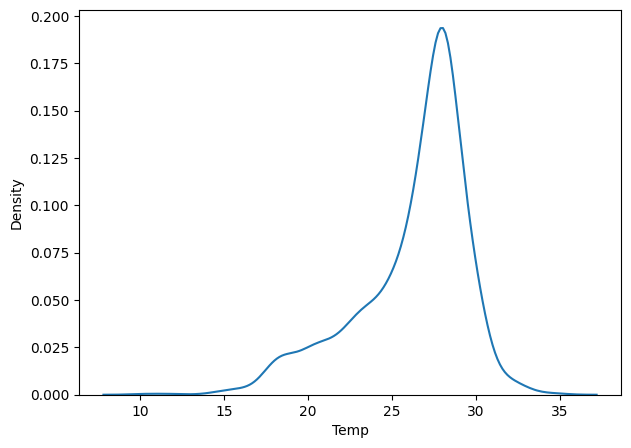

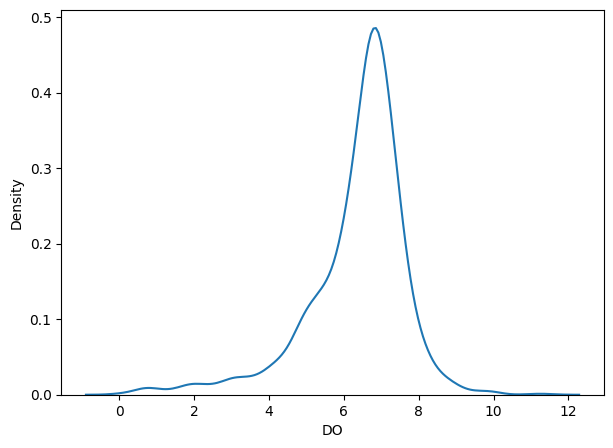

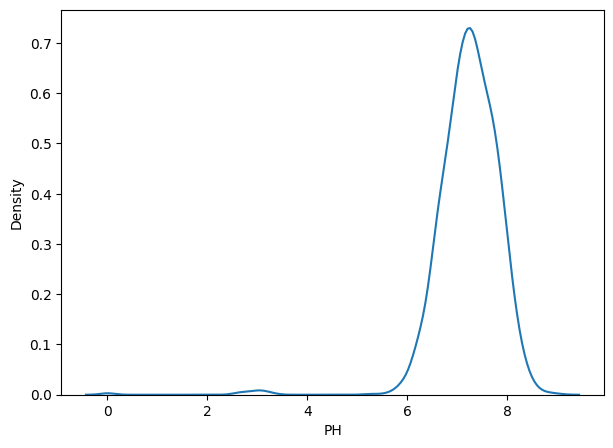

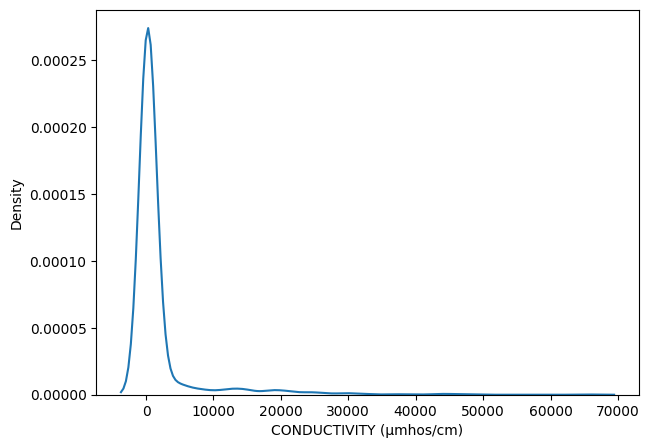

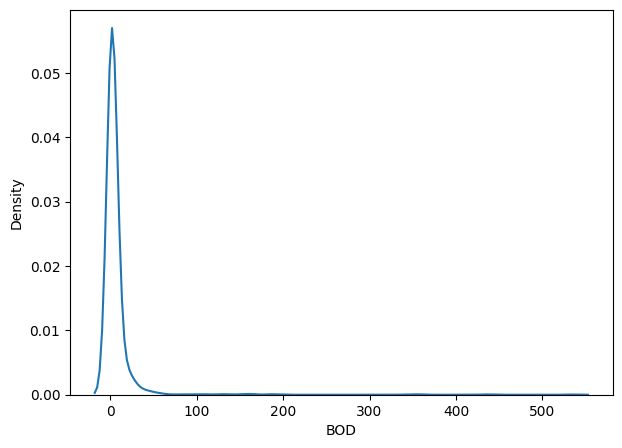

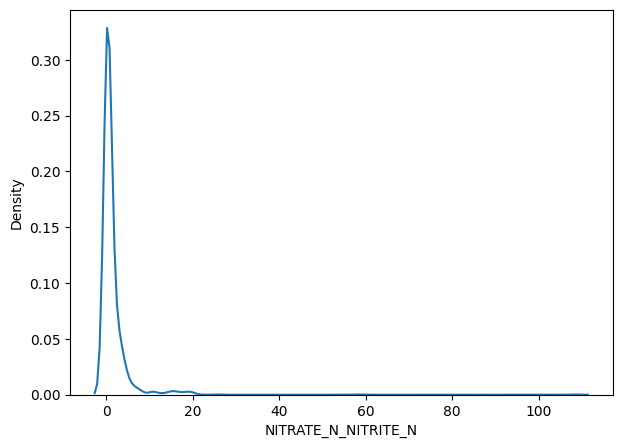

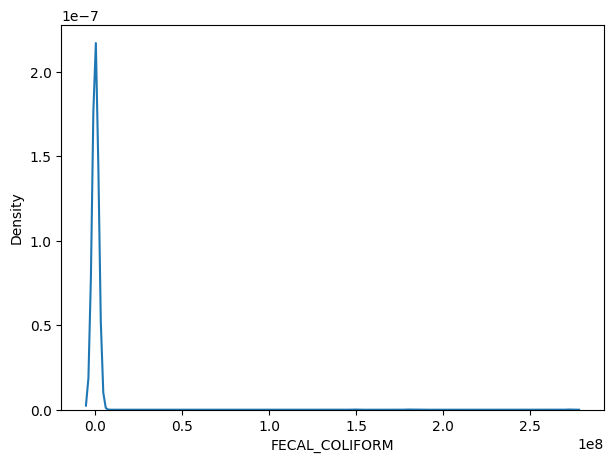

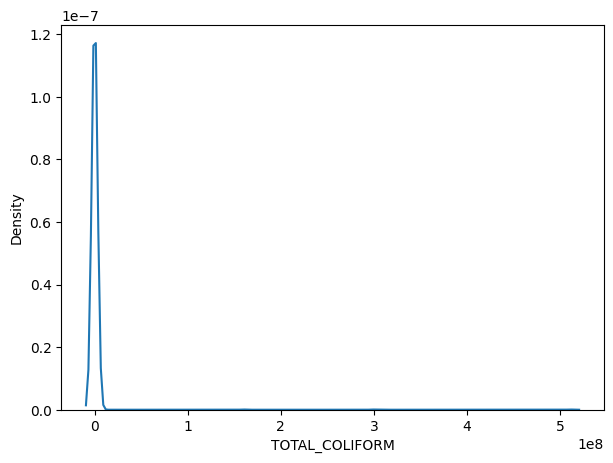

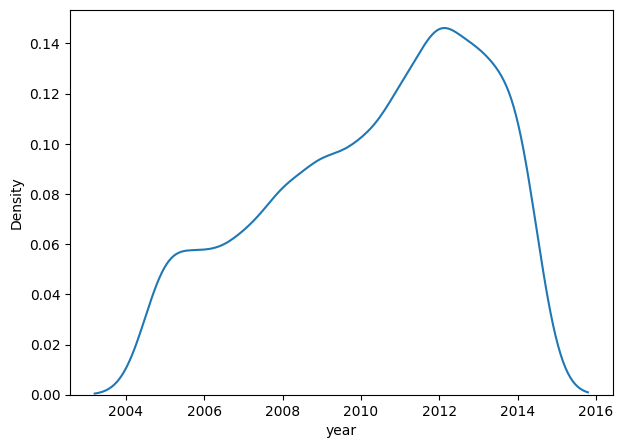

In [96]:
#Tracer PDFs de tous les attributs numériques de l’ensemble de données

df_num_final = df_final.select_dtypes(exclude="object")

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

In [97]:
# Ici, presque tous les plots kde sont gaussiens 
# Utilisation de la normalisation Z-Score pour détecter les valeurs aberrantes

df_num_final_norm = df_num_final.apply(zscore, axis=0)

def indices_of_greater_than_3(df_norm):
    indices_arr = []
    n_col = df_norm.shape[1]
    for index in range(n_col):
        col_index = df_norm.iloc[:, index]
        greater_than_3 = col_index[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(df_num_final_norm)
print("Number of outliers using Z-Score method: ", len(indices_arr))
df_final.iloc[indices_arr, :]


Number of outliers using Z-Score method:  125


,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY (µmhos/cm),BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year
741,2880,NAMBUL RIVER AT BISHNUPUR,MANIPUR,28.0,8.2,7.6,112.0,2.1,0.10,4.0,31.0,2012.0
745,2856,"THOUBAL RIVER AT YAIRIPOK, THOUBAL",MANIPUR,30.0,9.3,7.6,193.0,2.3,0.10,4.0,41.0,2012.0
37,2671,KUNDALIKA RIVER NEAR SALAV BRIDGE (SALINA ZONE...,MAHARASHTRA,25.3,5.3,7.7,24062.0,9.9,1.20,156.0,304.0,2014.0
88,2294,R KALLAI AT KALLAI BRIDGE,KERALA,26.3,3.7,7.7,32005.0,1.2,0.90,40000.0,60392.0,2014.0
108,2304,R MOGRAL AT MOGRAL BR.,KERALA,30.0,5.6,7.2,24360.0,2.1,0.30,92.0,447.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.00,1328.0,4975.0,2013.0
685,1023,GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA),PUNJAB,21.0,5.5,7.4,635.0,8.8,5.08,1400.0,5500.0,2012.0
172,3023,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUE...",TAMILNADU,24.3,0.9,7.6,2039.0,104.5,0.90,272521616.0,511090873.0,2014.0
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.00,1328.0,4975.0,2013.0


In [98]:
df_final.drop(indices_arr, axis=0, inplace=True)
df_final.shape

(1786, 12)

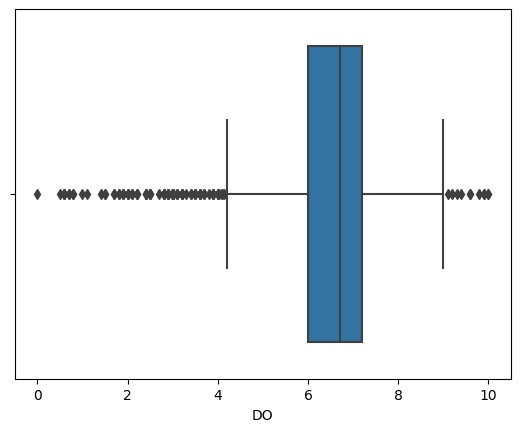

In [99]:
import seaborn as sns

# Créer un boxplot pour la colonne d'intérêt
sns.boxplot(x=df_final["DO"])

# Afficher le graphique
plt.show()


In [ ]:
# Calculating Water Quality Index of each sample
df_num_final = df_final.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num_final.drop(["year", "Temp"], axis=1, inplace=True)

# Weight Vector(wi)
wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022])

# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 100, 1000])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0, 0])

def calc_wqi(sample): 
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [ ]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [ ]:
wqi_arr = calc_wqi_for_df(df_num_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_final = df_final.reset_index()

In [ ]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([df_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(1786, 13)

In [ ]:
# These are samples with negative WQI
df_wqi[(df_wqi["WQI"] < 0)]

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year,WQI
196,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,20.5,6.7,2.7,1350.0,3.3,1.10,7.0,16.0,2014.0,-6.855044
231,2,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,28.0,6.8,0.0,208.0,1.5,0.10,4.0,10.0,2013.0,-70.569924
234,1865,RIVER DHADAR AT KOTHADA,GUJARAT,28.0,6.8,0.0,506.0,1.5,6.00,26.0,227.0,2013.0,-69.325357
446,3375,LUKHA RIVER,MEGHALAYA,21.3,6.8,2.7,1074.0,3.2,2.33,4.0,11.0,2013.0,-8.214971
719,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,25.0,6.9,2.6,1072.0,3.2,1.17,3.0,21.0,2012.0,-10.579224


In [ ]:
# Removing the samples with negative WQI
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

In [ ]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (4 if (0 <=x <= 25)
                                        else(3 if (26<=x<=50)
                                        else(2 if (51<=x<=75)
                                        else(1 if (76<=x<=100)
                                        else 0)))))

In [ ]:
df_wqi.tail()

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year,WQI,WQI clf
1781,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,28.0,6.6,7.81,603.2,2.675,0.263,40.0,191.0,2005.0,77.315135,1
1782,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,28.0,6.6,7.49,571.5,2.091,0.256,151.0,273.0,2005.0,69.053768,2
1783,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,5.4,7.16,75.8,2.092,0.100,404.0,513.0,2005.0,74.624853,2
1784,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,30.0,5.4,7.37,104.8,1.802,0.215,456.0,557.0,2005.0,76.881207,1
1785,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",TRIPURA,29.0,5.3,7.37,102.2,2.552,0.202,526.0,583.0,2005.0,85.552020,1


In [ ]:
n_unsuitable=(df_wqi['WQI clf']==0).sum()
n_very_poor=(df_wqi['WQI clf']==1).sum()
n_poor=(df_wqi['WQI clf']==2).sum()
n_good=(df_wqi['WQI clf']==3).sum()
n_excellent=(df_wqi['WQI clf']==4).sum()

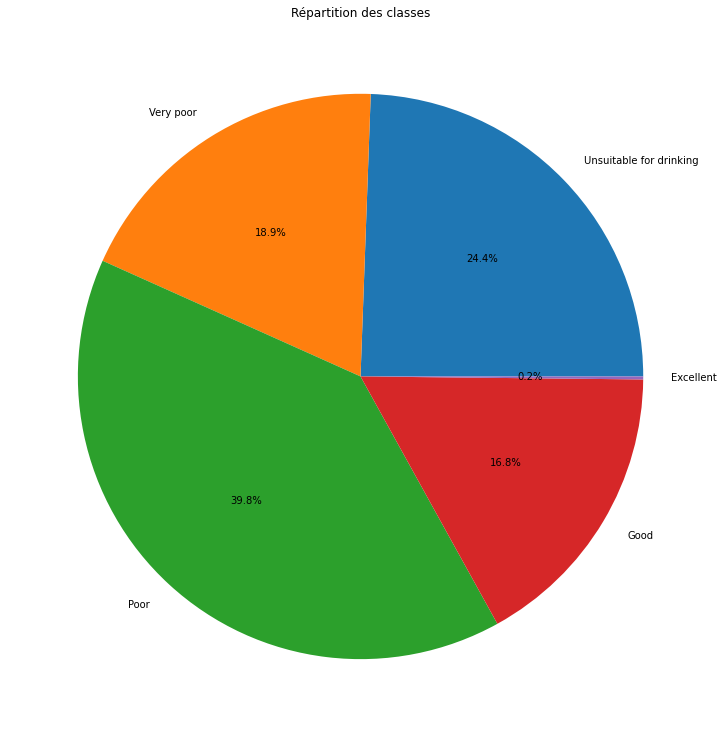

In [ ]:
import matplotlib.pyplot as plt
# Définition des classes et de leurs effectifs
classes = ['Unsuitable for drinking', 'Very poor', 'Poor', 'Good', 'Excellent']
effectifs = [n_unsuitable,n_very_poor,n_poor,n_good,n_excellent]
# Création du diagramme circulaire
fig, ax = plt.subplots()
ax.pie(effectifs, labels=classes, autopct='%2.1f%%')
# Définir la taille de la figure
fig.set_size_inches(14, 13)
# Ajout d'un titre
ax.set_title('Répartition des classes')
# Affichage du diagramme
plt.show()

In [ ]:
import pandas as pd
# Enregistrement en format CSV sans index
df_wqi.to_csv('Data/Water_dataX_most_frequent.csv', index=False)

# remplacer les valeurs manquantes par le moyenne de chaque state

In [100]:
df=pd.read_csv("water_dataX.csv",encoding= 'unicode_escape')
#Selectionner seulement les 1900 examples premiers car les autres exemples incorect 
#en plus contient beaucoup des donneés aberantes
df = df.iloc[0:1901, :]

In [101]:
#afficher les 5 premiére lignes
df.head(5)

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [102]:
#afficher la taille du dataframe (nb_lignes,nb_colonnes)
df.shape

(1901, 12)

In [104]:
#afficher les types des données dans chaque variables du dataframe
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [105]:
df.nunique()

STATION CODE                         321
LOCATIONS                            656
STATE                                203
Temp                                 179
D.O. (mg/l)                          166
PH                                   185
CONDUCTIVITY (µmhos/cm)              971
B.O.D. (mg/l)                        404
NITRATENAN N+ NITRITENANN (mg/l)     469
FECAL COLIFORM (MPN/100ml)           819
TOTAL COLIFORM (MPN/100ml)Mean      1061
year                                  10
dtype: int64

In [106]:
#convertir le types des donneés d'un certains variables en float
df['Temp']=pd.to_numeric(df['Temp'], errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'], errors='coerce')
df['PH']=pd.to_numeric(df['PH'], errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'], errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'], errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce')
df['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(df['FECAL COLIFORM (MPN/100ml)'], errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')

In [107]:
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [108]:
#renommer les variables par des target plus simplement à utiliser que les anciennes 
df = df.rename(columns={'D.O. (mg/l)': 'DO'})
df = df.rename(columns={'CONDUCTIVITY (�mhos/cm)': 'CONDUCTIVITY'})
df = df.rename(columns={'B.O.D. (mg/l)': 'BOD'})
df = df.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)': 'NITRATE_N_NITRITE_N'})
df = df.rename(columns={'FECAL COLIFORM (MPN/100ml)': 'FECAL_COLIFORM'})
df = df.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean': 'TOTAL_COLIFORM'})
df.head(5)

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY (µmhos/cm),BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014


In [109]:
# Remplacer la chaine de caractere NAN valeur par la valeur NAN (np.nan)
def convert_to_nan(df):
    #récupère le nombre de colonnes dans df en utilisant l'attribut shape de l'objet DataFrame
    #qui renvoie un tuple contenant le nombre de lignes et de colonnes
    n_col = df.shape[1] 
    #on parcourt chaque colonne du DataFrame df à l'aide de la boucle for et index
    for index in range(n_col):
        #La ligne df.iloc[:, index] permet d'accéder à toutes les lignes de la colonne correspondante.
        #La méthode replace() est ensuite appliquée à la colonne pour remplacer chaque occurrence 
        #de la chaîne de caractères "NAN" par la valeur NaN de la bibliothèque Numpy. 
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

df = convert_to_nan(df)

In [110]:
df.shape

(1901, 12)

<Axes: title={'center': 'Missing Values Per Feature'}>

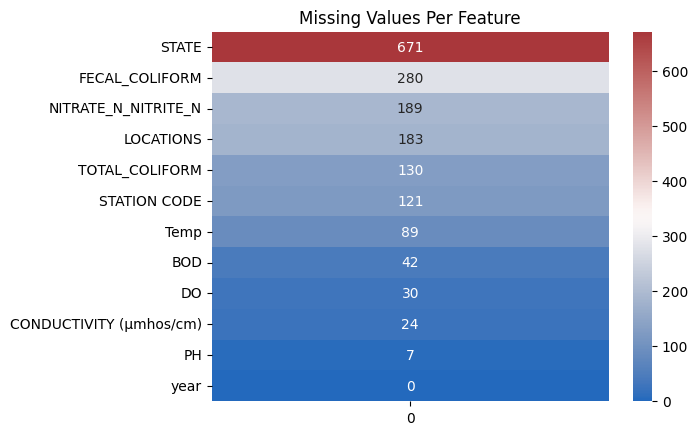

In [111]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [112]:
# Filling Categorical missing values
df_temp = df.select_dtypes(include="object")
df_temp.isnull().sum()

STATION CODE    121
LOCATIONS       183
STATE           671
dtype: int64

In [113]:
# ici on peut remplir ces valeurs par observer les autres attributs
# Exemple - 
pd.set_option('mode.chained_assignment', None)
df_temporaire = df_temp.copy()

df_temporaire[df_temporaire["STATION CODE"] == "1330"]
# Station Code qui a la valeur 1330 du Location - TAMBIRAPARANI qui appartient à STATE - TAMIL NADU
#je peux remplacer les occuerences du valeur NAN dans la case STATE par TAMILNADU
df_temporaire["STATE"][df_temporaire["STATION CODE"] == "1330"] = df_temporaire["STATE"][df_temporaire["STATION CODE"] == "1330"].fillna("TAMILNADU")

df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [114]:
# Les valeurs NULL dans l’attribut LOCATION sont dans l’attribut STATE (ex - au-dessus du dataframe)
# Ainsi, je remplirai les valeurs NULL dans l’attribut LOCATION avec la valeur STATE correspondante
# Et la valeur d’état sera remplacée par la fonction "fill_state" définie en dessous de cette cellule

def fill_locations(df_cat):
    location_null = df_cat[df_cat["LOCATIONS"].isnull()]
    location_null_indices = location_null.index
    for index in location_null_indices:
        state_value = location_null["STATE"][index]
        location_null["LOCATIONS"][index] = state_value
        location_null["STATE"][index] = np.nan
    df_cat[df_cat["LOCATIONS"].isnull()] = location_null
    return

fill_locations(df_temporaire)
df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [115]:
df_temporaire[df_temporaire["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


In [116]:
# je peux remplir les valeurs NULL du code de la station avec la valeur LOCATION correspondante (ex - au-dessus de la base de données)
#je vais faire la valeur LOCATION correspondante avec une autre valeur LOCATION identique et insérera la valeur du code station

def fill_code(df_cat):
    station_null = df_cat[df_cat["STATION CODE"].isnull()]
    station_null_indices = station_null.index
    for index in station_null_indices:
        stat_code = np.nan
        location_index = station_null["LOCATIONS"][index]
        code_at_location = df_cat["STATION CODE"][df_cat["LOCATIONS"] == location_index]
        for index_code in code_at_location.index:
            if (code_at_location[index_code] != np.nan):
                stat_code = code_at_location[index_code]
                break
        station_null["STATION CODE"][index] = stat_code
    df_cat[df_cat["STATION CODE"].isnull()] = station_null
    return

fill_code(df_temporaire)
df_temporaire[df_temporaire["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


In [117]:
# Remplissage de toutes les valeurs NAN d’état qui ont une valeur de code de station correspondante
def fill_state(df_cat):
    station_code = df_cat["STATION CODE"].unique()
    for index in range(station_code.shape[0]):
        if (station_code[index] != np.nan):
            df_state = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] 
            state_values = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]]
            state = np.nan
            for index_state in range(state_values.shape[0]):
                if (state_values.iloc[index_state] != np.nan):
                    state = state_values.iloc[index_state]
                    break
            df_state_fill = df_state.fillna(state) 
            df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] = df_state_fill
    return
fill_state(df_temporaire)
df_temporaire[df_temporaire["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [118]:
df_temporaire.isnull().sum()

STATION CODE     4
LOCATIONS        2
STATE           12
dtype: int64

In [119]:
df_temporaire[df_temporaire["STATE"].isnull()]

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1106,1207,KABBANI AT MUTHANKARA,NaN
1107,1208,BHAVANI AT ELACHIVAZHY,NaN
1650,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1651,2048,"PATIALA KI RAO, CHANDIGARH",NaN
1652,2049,"SUKHNA CHOE, CHANDIGARH",NaN
1770,2047,NNANCHOE (ATTAWA CHOE),NaN
1771,2048,PATIALA KI RAO,NaN
1772,2049,SUKHNA CHOE,NaN


In [120]:
# Le premier emplacement KABBANI AT MUTHANKARA est dans l’ÉTAT Kerela
df_temporaire["STATE"][1106] = "KERALA"
df_temporaire["STATE"][1107] = "KERALA"
df_temporaire["STATE"][1650] = "CHANDIGARH"
df_temporaire["STATE"][1651] = "CHANDIGARH"
df_temporaire["STATE"][1652] = "CHANDIGARH"
df_temporaire["STATE"][1770] = "CHANDIGARH"
df_temporaire["STATE"][1771] = "CHANDIGARH"
df_temporaire["STATE"][1772] = "CHANDIGARH"
df_temporaire["STATE"][1784] = "DAMAN & DIU"
df_temporaire["STATE"][1785] = "DAMAN & DIU"
df_temporaire["STATION CODE"][1784] = "0000" 
df_temporaire["STATION CODE"][1785] = "0000"

<Axes: title={'center': 'Missing Values Per Feature'}>

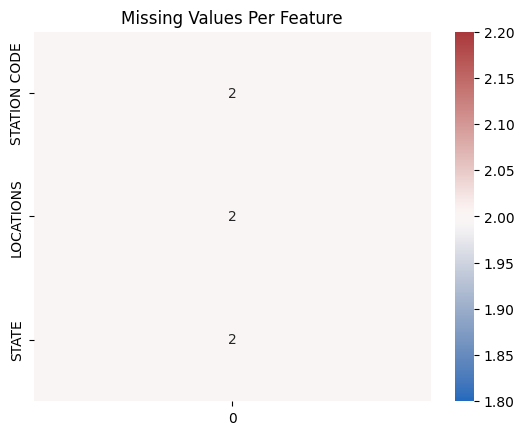

In [121]:
df_res = df_temporaire
plt.title('Missing Values Per Feature')
nans = df_res.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [122]:
df_res.shape

(1901, 3)

In [123]:
df_num = df.select_dtypes(exclude="object")# Selectioner les donneés numériques
df_num_col = df_num.columns 

In [124]:
df_num.shape

(1901, 9)

<Axes: title={'center': 'Missing Values Per Feature'}>

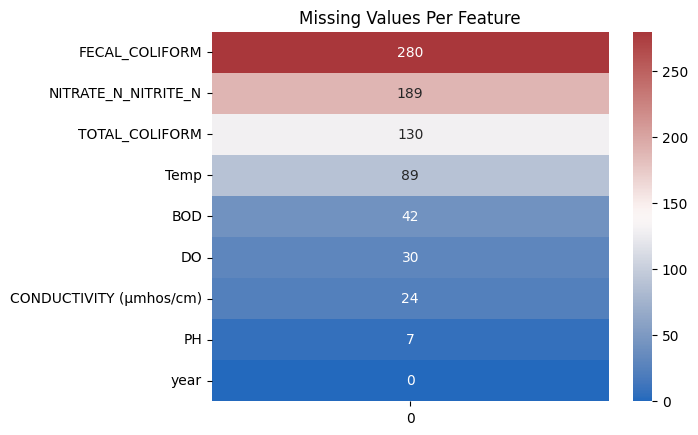

In [125]:
plt.title('Missing Values Per Feature')
nans = df_num.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<Axes: title={'center': 'Missing Values Per Feature'}>

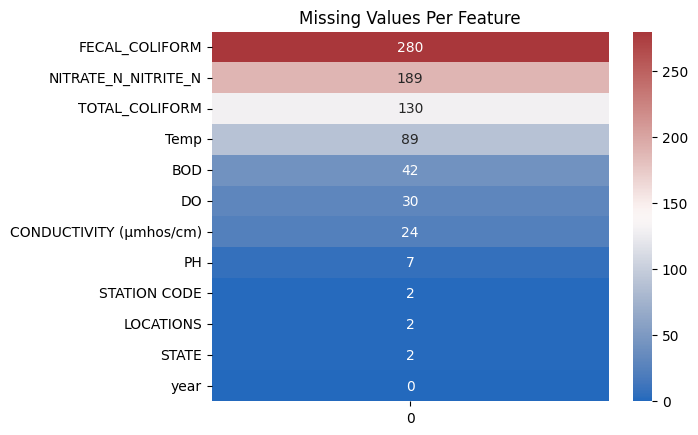

In [126]:
df_final = pd.concat([df_res, df_num], axis=1)
plt.title('Missing Values Per Feature')
nans = df_final.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<Axes: title={'center': 'Missing Values Per Feature'}>

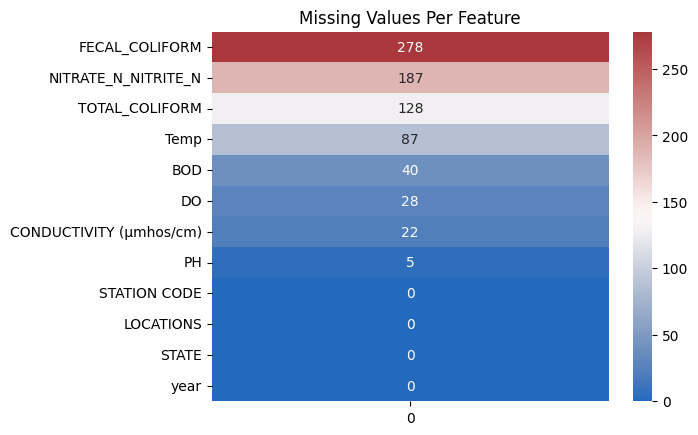

In [127]:
# Ce sont les exemples qui ne contiennent aucun attribut
# Les attributs remplis sont la médiane des colonnes correspondantes
# Il est donc préférable de les supprimer
df_null = df_final[(df_final["STATION CODE"].isnull()) & (df_final["LOCATIONS"].isnull()) & (df_final["STATE"].isnull())]
df_null_indices = df_null.index
df_final.drop(df_null_indices, axis=0, inplace=True)
df_null
plt.title('Missing Values Per Feature')
nans = df_final.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [128]:
B=set()
for i in df_final['STATE']:
    B.add(i)
print(B)

{'ANDHRA PRADESH', 'CHANDIGARH', 'KERALA', 'ODISHA', 'KARNATAKA', 'tripura', 'HIMACHAL PRADESH', 'MADHYA PRADESH', 'TAMIL NADU', 'GUJARAT', 'MANIPUR', 'PONDICHERRY', 'HARYANA', 'GOA', 'ORISSA', 'DAMAN, DIU, DADRA NAGAR HAVELI', 'MEGHALAYA', 'DAMAN & DIU', 'TAMILNADU', 'RAJASTHAN', 'MIZORAM', 'PUNJAB', 'TRIPURA', 'MAHARASHTRA'}


In [129]:
# remplacer les valeurs manquantes de chaque colonne par la moyenne de cette colonne pour toutes les lignes qui ont le même état
df_clean = df_final.fillna(df_final.groupby('STATE').transform('mean'))

<ipython-input-129-00624bb5e1a9>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df_clean = df_final.fillna(df_final.groupby('STATE').transform('mean'))


<Axes: title={'center': 'Missing Values Per Feature'}>

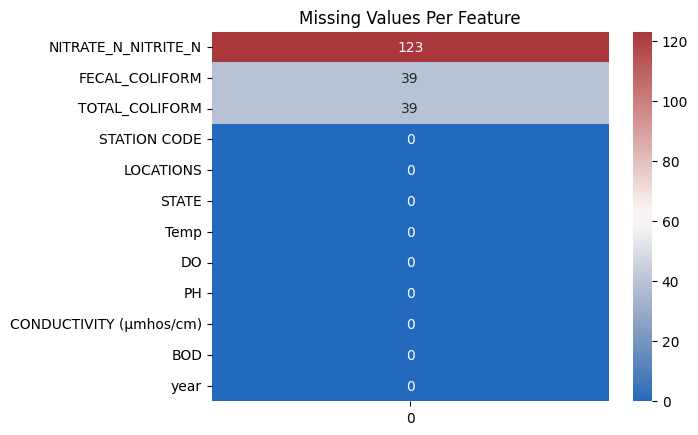

In [130]:
plt.title('Missing Values Per Feature')
nans = df_clean.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [131]:
df_clean.shape

(1899, 12)

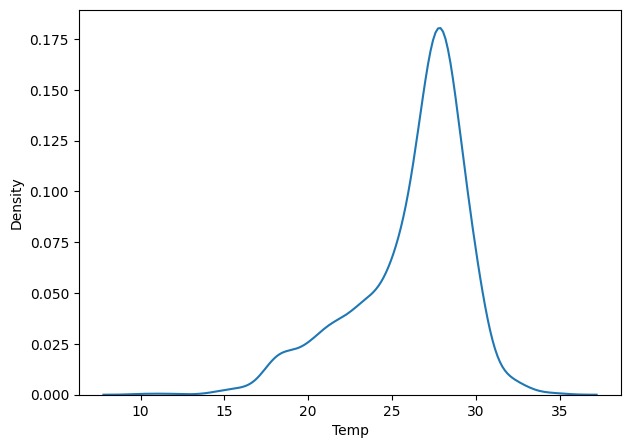

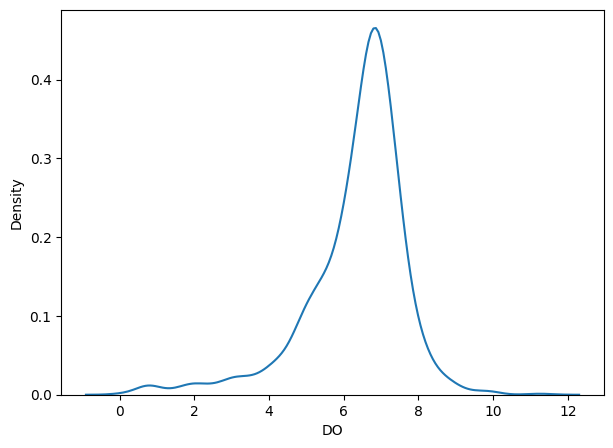

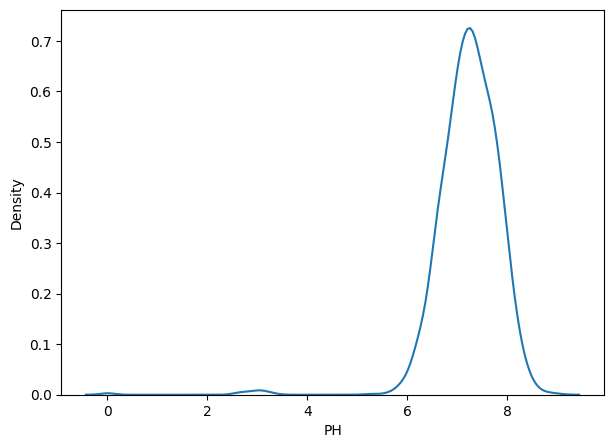

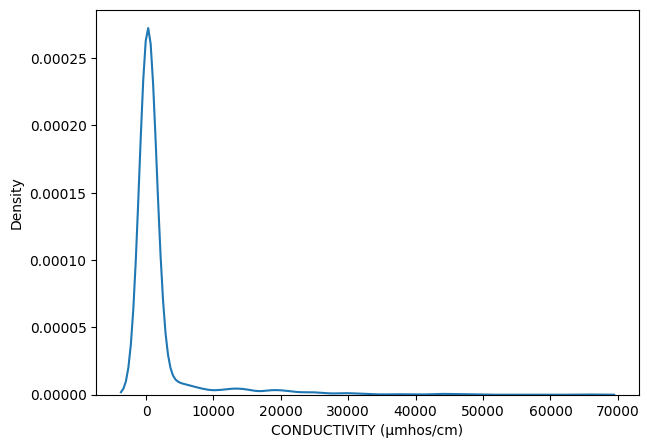

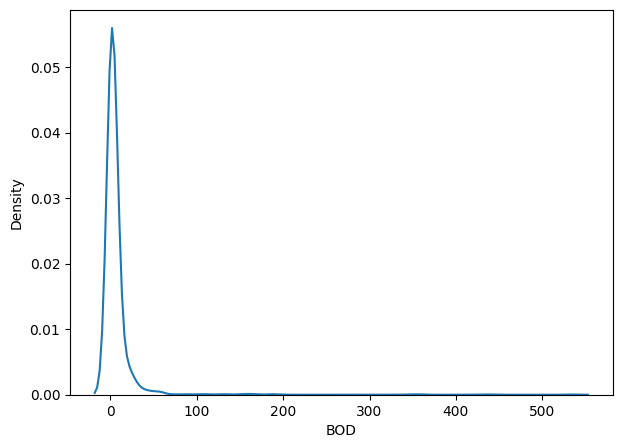

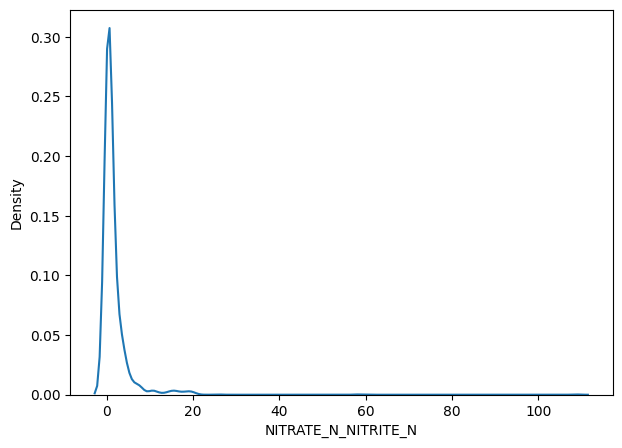

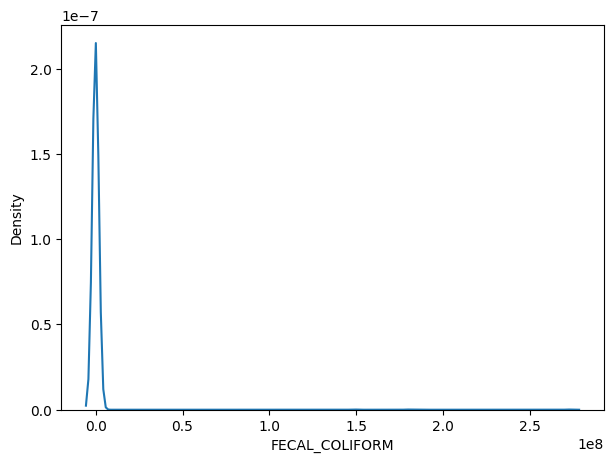

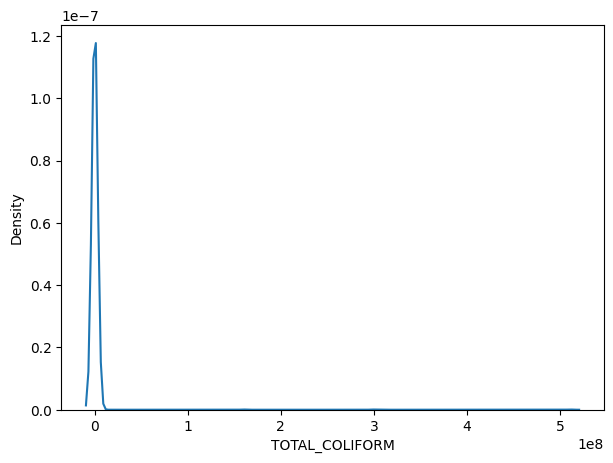

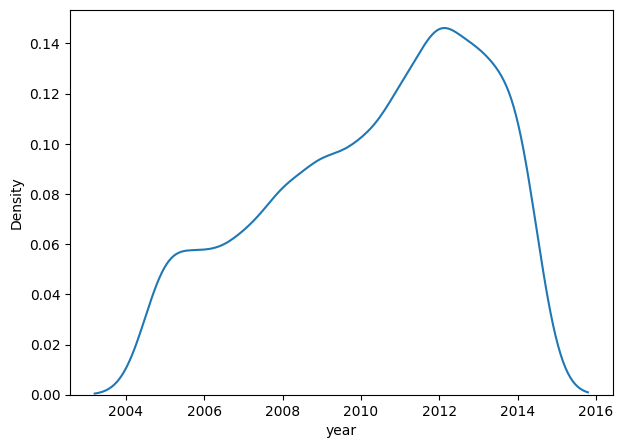

In [132]:
#Tracer PDFs de tous les attributs numériques de l’ensemble de données

df_num_final = df_clean.select_dtypes(exclude="object")

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

In [133]:
df_num_final.shape

(1899, 9)

In [134]:
# Ici, presque tous les plots kde sont gaussiens 
# Utilisation de la normalisation Z-Score pour détecter les valeurs aberrantes

df_num_final_norm = df_num_final.apply(zscore, axis=0)

def indices_of_greater_than_3(df_norm):
    indices_arr = []
    n_col = df_norm.shape[1]
    for index in range(n_col):
        col_index = df_norm.iloc[:, index]
        greater_than_3 = col_index[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(df_num_final_norm)
print("Number of outliers using Z-Score method: ", len(indices_arr))
df_clean.iloc[indices_arr, :]

Number of outliers using Z-Score method:  79


,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY (µmhos/cm),BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year
741,2880,NAMBUL RIVER AT BISHNUPUR,MANIPUR,28.00000,8.2,7.60,112.0,2.100,NaN,100.0,31.0,2012
745,2856,"THOUBAL RIVER AT YAIRIPOK, THOUBAL",MANIPUR,30.00000,9.3,7.60,193.0,2.300,NaN,100.0,41.0,2012
37,2671,KUNDALIKA RIVER NEAR SALAV BRIDGE (SALINA ZONE...,MAHARASHTRA,25.30000,5.3,7.70,24062.0,9.900,1.200,156.0,304.0,2014
88,2294,R KALLAI AT KALLAI BRIDGE,KERALA,26.30000,3.7,7.70,32005.0,1.200,0.900,40000.0,60392.0,2014
108,2304,R MOGRAL AT MOGRAL BR.,KERALA,30.00000,5.6,7.20,24360.0,2.100,0.300,92.0,447.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1773,1427,"UMTREW AT BYRNIHAT EAST, MEGHALAYA",MEGHALAYA,16.00000,7.2,7.00,183.0,5.200,2.600,140.0,180.0,2006
1774,1428,"KHARKHLA NEAR SUTNGA KHLIERIAT,JAINTIA HILLS D...",MEGHALAYA,15.00000,4.6,3.00,350.0,6.200,2.200,33.0,49.0,2006
1787,1246,"DAMANGANGA AT KACHIGAON D\S (DAMAN),GUJARAT",GUJARAT,27.00000,5.0,7.22,18370.3,19.663,0.452,9625.0,13525.0,2005
1807,1438,"MINDHOLA AT STATE HIGHWAY BRIDGE SACHIN, GUJARAT",GUJARAT,27.67791,6.1,8.00,602.5,5.640,1.035,38143.0,38428.0,2005


In [135]:
df_clean.drop(indices_arr, axis=0, inplace=True)
df_clean.shape

(1823, 12)

<Axes: title={'center': 'Missing Values Per Feature'}>

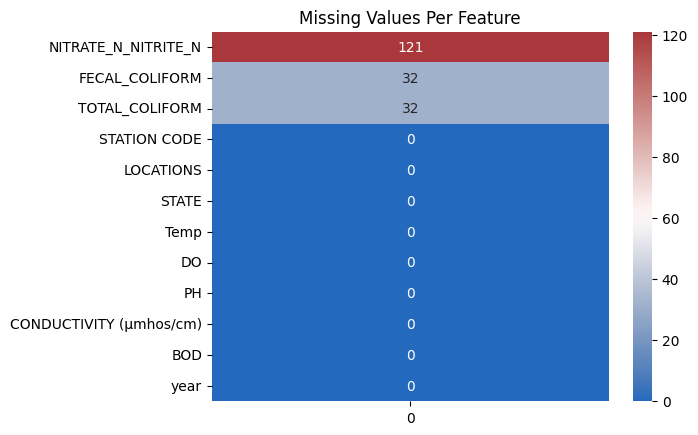

In [136]:
plt.title('Missing Values Per Feature')
nans = df_clean.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [137]:
df_clean=df_clean.dropna()

<Axes: title={'center': 'Missing Values Per Feature'}>

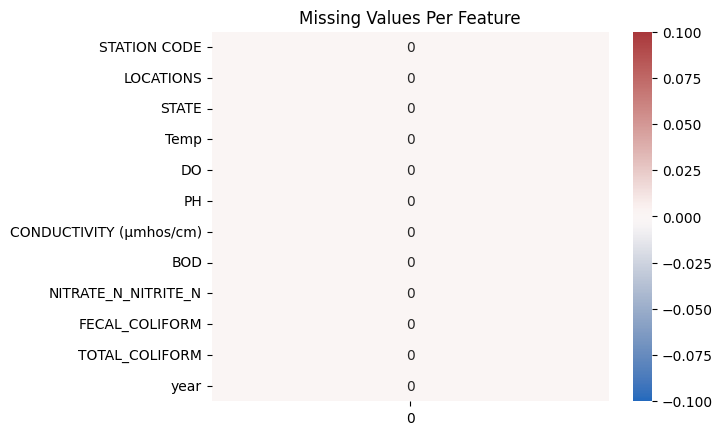

In [138]:
plt.title('Missing Values Per Feature')
nans = df_clean.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [139]:
df_clean.shape

(1670, 12)

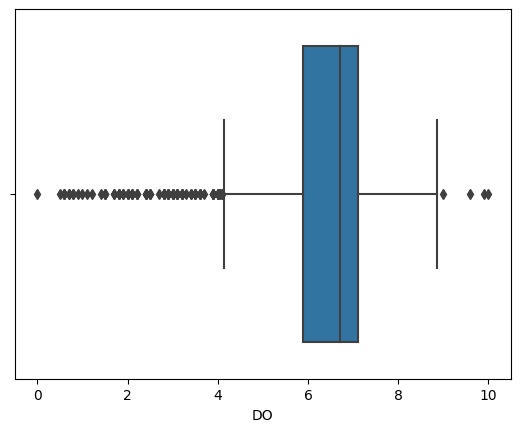

In [141]:
import pandas as pd
import seaborn as sns

# Créer un boxplot pour la colonne d'intérêt
sns.boxplot(x=df_clean["DO"])

# Afficher le graphique
plt.show()


In [ ]:
# Calculating Water Quality Index of each sample
df_num_final = df_clean.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num_final.drop(["year", "Temp"], axis=1, inplace=True)

# Weight Vector(wi)
wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022])

# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 100, 1000])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0, 0])

def calc_wqi(sample): 
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [ ]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [ ]:
wqi_arr = calc_wqi_for_df(df_num_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_clean = df_clean.reset_index()

In [ ]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([df_clean, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(1670, 13)

In [ ]:
# These are samples with negative WQI
df_wqi[(df_wqi["WQI"] < 0)]

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year,WQI
194,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,20.5,6.7,2.7,1350.0,3.3,1.10,7.0,16.0,2014,-6.855044
443,3375,LUKHA RIVER,MEGHALAYA,21.3,6.8,2.7,1074.0,3.2,2.33,4.0,11.0,2013,-8.214971
680,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,25.0,6.9,2.6,1072.0,3.2,1.17,3.0,21.0,2012,-10.579224


In [ ]:
# Removing the samples with negative WQI
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

In [ ]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (4 if (0 <=x <= 25)
                                        else(3 if (26<=x<=50)
                                        else(2 if (51<=x<=75)
                                        else(1 if (76<=x<=100)
                                        else 0)))))

In [ ]:
df_wqi.tail()

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year,WQI,WQI clf
1665,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,26.938333,6.6,7.81,603.2,2.675,0.26300,40.0,191.0,2005,77.315135,1
1666,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,28.000000,6.6,7.49,571.5,2.091,0.25600,151.0,273.0,2005,69.053768,2
1667,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.000000,5.4,7.16,75.8,2.092,0.43285,404.0,513.0,2005,74.661245,2
1668,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,30.000000,5.4,7.37,104.8,1.802,0.21500,456.0,557.0,2005,76.881207,1
1669,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",TRIPURA,29.000000,5.3,7.37,102.2,2.552,0.20200,526.0,583.0,2005,85.552020,1


In [ ]:
n_unsuitable=(df_wqi['WQI clf']==0).sum()
n_very_poor=(df_wqi['WQI clf']==1).sum()
n_poor=(df_wqi['WQI clf']==2).sum()
n_good=(df_wqi['WQI clf']==3).sum()
n_excellent=(df_wqi['WQI clf']==4).sum()

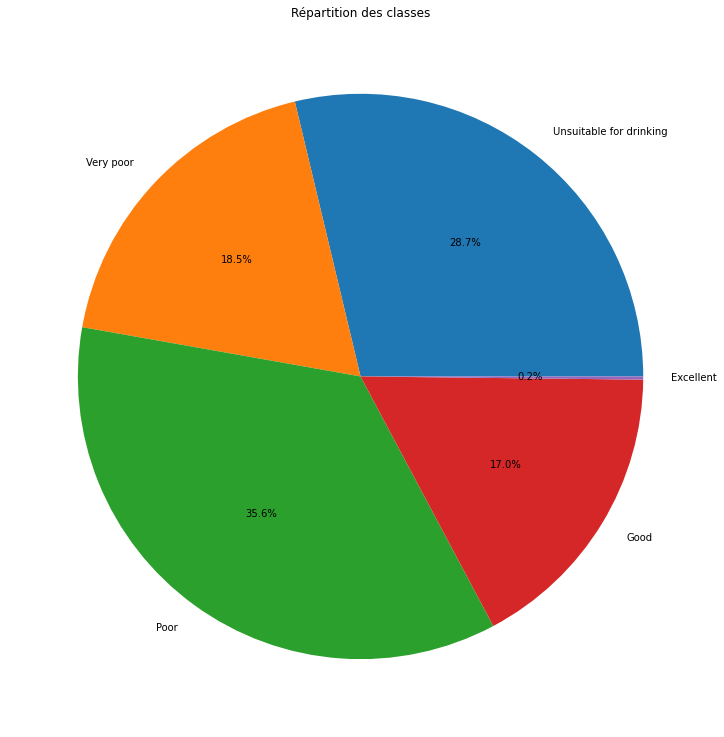

In [ ]:
import matplotlib.pyplot as plt
# Définition des classes et de leurs effectifs
classes = ['Unsuitable for drinking', 'Very poor', 'Poor', 'Good', 'Excellent']
effectifs = [n_unsuitable,n_very_poor,n_poor,n_good,n_excellent]
# Création du diagramme circulaire
fig, ax = plt.subplots()
ax.pie(effectifs, labels=classes, autopct='%2.1f%%')
# Définir la taille de la figure
fig.set_size_inches(14, 13)
# Ajout d'un titre
ax.set_title('Répartition des classes')
# Affichage du diagramme
plt.show()

In [ ]:
import pandas as pd
# Enregistrement en format CSV sans index
df_wqi.to_csv('Data/Water_dataX_mean_state.csv', index=False)